In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
data = pd.read_excel('Приложение к кейсу. data.xls')
# parse_dates=['Время движения час:мин:сек', 
# 'Время работы двигателя, час:мин:сек', 
# 'Время работы двигателя в движении, час:мин:сек', 
# 'Время работы двигателя без движения, час:мин:сек',
# 'Время работы двигателя на холостом ходу, час:мин:сек',
# 'Время работы двигателя на нормальных оборотах, час:мин:сек',
# 'Время работы двигателя на предельных оборотах, час:мин:сек',
# 'Время с выключенным двигателем, час:мин:сек',
# 'Время работы двигателя под нагрузкой, час:мин:сек']
# )

In [4]:
data.dtypes

id                                                              int64
Дата                                                           object
Пробег, км                                                    float64
Время движения час:мин:сек                                     object
Время работы двигателя, час:мин:сек                            object
Время работы двигателя в движении, час:мин:сек                 object
Время работы двигателя без движения, час:мин:сек               object
Время работы двигателя на холостом ходу, час:мин:сек           object
Время работы двигателя на нормальных оборотах, час:мин:сек     object
Время работы двигателя на предельных оборотах, час:мин:сек     object
Время с выключенным двигателем, час:мин:сек                    object
Время работы двигателя под нагрузкой, час:мин:сек              object
Начальный объём, л.1                                          float64
Конечный объём, л.1                                           float64
dtype: object

In [5]:
data

id        Дата  Пробег, км Время движения час:мин:сек  \
0     734  01.06.2021        0.00                   00:00:00   
1     734  02.06.2021        0.00                   00:00:00   
2     734  03.06.2021        0.00                   00:00:00   
3     734  04.06.2021        0.00                   00:00:00   
4     734  05.06.2021        0.49                   00:11:08   
...   ...         ...         ...                        ...   
1195  891  26.06.2021        8.08                   01:08:54   
1196  891  27.06.2021       22.90                   03:43:19   
1197  891  28.06.2021       17.47                   02:28:58   
1198  891  29.06.2021       26.59                   03:22:44   
1199  891  30.06.2021       18.56                   02:33:38   

     Время работы двигателя, час:мин:сек  \
0                               00:00:00   
1                               00:00:00   
2                               00:00:00   
3                               00:00:00   
4                               02:35:04   
...                                  ...   
1195                            02:45:08   
1196                            07:51:00   
1197                            08:33:10   
1198                            08:34:57   
1199                            08:30:30   

     Время работы двигателя в движении, час:мин:сек  \
0                                          00:00:00   
1                                          00:00:00   
2                                          00:00:00   
3                                          00:00:00   
4                                          00:11:08   
...                                             ...   
1195                                       01:04:50   
1196                                       03:42:37   
1197                                       02:28:01   
1198                                       03:20:11   
1199                                       02:31:29   

     Время работы двигателя без движения, час:мин:сек  \
0                                            00:00:00   
1                                            00:00:00   
2                                            00:00:00   
3                                            00:00:00   
4                                            02:23:56   
...                                               ...   
1195                                         01:40:18   
1196                                         04:08:23   
1197                                         06:05:09   
1198                                         05:14:46   
1199                                         05:59:01   

     Время работы двигателя на холостом ходу, час:мин:сек  \
0                                              00:00:00     
1                                              00:00:00     
2                                              00:00:00     
3                                              00:00:00     
4                                              00:39:15     
...                                                 ...     
1195                                           02:45:08     
1196                                           07:51:00     
1197                                           08:33:10     
1198                                           08:34:57     
1199                                           08:30:30     

     Время работы двигателя на нормальных оборотах, час:мин:сек  \
0                                              00:00:00           
1                                              00:00:00           
2                                              00:00:00           
3                                              00:00:00           
4                                              01:55:49           
...                                                 ...           
1195                                           00:00:00           
1196                                           00:00:00           
1197                       

In [6]:
col = data.loc[:, 'Время движения час:мин:сек': 'Время работы двигателя под нагрузкой, час:мин:сек'].columns

In [7]:
col

Index(['Время движения час:мин:сек', 'Время работы двигателя, час:мин:сек',
       'Время работы двигателя в движении, час:мин:сек',
       'Время работы двигателя без движения, час:мин:сек',
       'Время работы двигателя на холостом ходу, час:мин:сек',
       'Время работы двигателя на нормальных оборотах, час:мин:сек',
       'Время работы двигателя на предельных оборотах, час:мин:сек',
       'Время с выключенным двигателем, час:мин:сек',
       'Время работы двигателя под нагрузкой, час:мин:сек'],
      dtype='object')

In [8]:
data['Время с выключенным двигателем, час:мин:сек'].fillna('00:00:00', inplace=True)

In [9]:
data.isna().sum()

id                                                               0
Дата                                                             0
Пробег, км                                                       0
Время движения час:мин:сек                                       0
Время работы двигателя, час:мин:сек                              0
Время работы двигателя в движении, час:мин:сек                   0
Время работы двигателя без движения, час:мин:сек                 0
Время работы двигателя на холостом ходу, час:мин:сек             0
Время работы двигателя на нормальных оборотах, час:мин:сек       0
Время работы двигателя на предельных оборотах, час:мин:сек       0
Время с выключенным двигателем, час:мин:сек                      0
Время работы двигателя под нагрузкой, час:мин:сек                0
Начальный объём, л.1                                          1170
Конечный объём, л.1                                           1170
dtype: int64

In [10]:
for c in col:
    splt = data[c].str.split(':', expand=True).astype('float32')
    data[c] = splt[0] * 3600 + splt[1] * 60 + splt[2]

In [11]:
data

id        Дата  Пробег, км  Время движения час:мин:сек  \
0     734  01.06.2021        0.00                         0.0   
1     734  02.06.2021        0.00                         0.0   
2     734  03.06.2021        0.00                         0.0   
3     734  04.06.2021        0.00                         0.0   
4     734  05.06.2021        0.49                       668.0   
...   ...         ...         ...                         ...   
1195  891  26.06.2021        8.08                      4134.0   
1196  891  27.06.2021       22.90                     13399.0   
1197  891  28.06.2021       17.47                      8938.0   
1198  891  29.06.2021       26.59                     12164.0   
1199  891  30.06.2021       18.56                      9218.0   

      Время работы двигателя, час:мин:сек  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                  9304.0   
...                                   ...   
1195                               9908.0   
1196                              28260.0   
1197                              30790.0   
1198                              30897.0   
1199                              30630.0   

      Время работы двигателя в движении, час:мин:сек  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                              668.0   
...                                              ...   
1195                                          3890.0   
1196                                         13357.0   
1197                                          8881.0   
1198                                         12011.0   
1199                                          9089.0   

      Время работы двигателя без движения, час:мин:сек  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                               8636.0   
...                                                ...   
1195                                            6018.0   
1196                                           14903.0   
1197                                           21909.0   
1198                                           18886.0   
1199                                           21541.0   

      Время работы двигателя на холостом ходу, час:мин:сек  \
0                                                   0.0      
1                                                   0.0      
2                                                   0.0      
3                                                   0.0      
4                                                2355.0      
...                                                 ...      
1195                                             9908.0      
1196                                            28260.0      
1197                                            30790.0      
1198                                            30897.0      
1199                                            30630.0      

      Время работы двигателя на нормальных оборотах, час:мин:сек  \
0                                                   0.0            
1                                                   0.0            
2                                                   0.0            
3                                                   0.0            
4                                                6949.0            
...                                                 ...            
1195                                                0.0            
1196                      

In [12]:
data.replace({0: float('NaN')}, inplace=True)

In [13]:
data

id        Дата  Пробег, км  Время движения час:мин:сек  \
0     734  01.06.2021         NaN                         NaN   
1     734  02.06.2021         NaN                         NaN   
2     734  03.06.2021         NaN                         NaN   
3     734  04.06.2021         NaN                         NaN   
4     734  05.06.2021        0.49                       668.0   
...   ...         ...         ...                         ...   
1195  891  26.06.2021        8.08                      4134.0   
1196  891  27.06.2021       22.90                     13399.0   
1197  891  28.06.2021       17.47                      8938.0   
1198  891  29.06.2021       26.59                     12164.0   
1199  891  30.06.2021       18.56                      9218.0   

      Время работы двигателя, час:мин:сек  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                  9304.0   
...                                   ...   
1195                               9908.0   
1196                              28260.0   
1197                              30790.0   
1198                              30897.0   
1199                              30630.0   

      Время работы двигателя в движении, час:мин:сек  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                              668.0   
...                                              ...   
1195                                          3890.0   
1196                                         13357.0   
1197                                          8881.0   
1198                                         12011.0   
1199                                          9089.0   

      Время работы двигателя без движения, час:мин:сек  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                               8636.0   
...                                                ...   
1195                                            6018.0   
1196                                           14903.0   
1197                                           21909.0   
1198                                           18886.0   
1199                                           21541.0   

      Время работы двигателя на холостом ходу, час:мин:сек  \
0                                                   NaN      
1                                                   NaN      
2                                                   NaN      
3                                                   NaN      
4                                                2355.0      
...                                                 ...      
1195                                             9908.0      
1196                                            28260.0      
1197                                            30790.0      
1198                                            30897.0      
1199                                            30630.0      

      Время работы двигателя на нормальных оборотах, час:мин:сек  \
0                                                   NaN            
1                                                   NaN            
2                                                   NaN            
3                                                   NaN            
4                                                6949.0            
...                                                 ...            
1195                                                NaN            
1196                      

In [14]:
search = data.corr()

<AxesSubplot:>

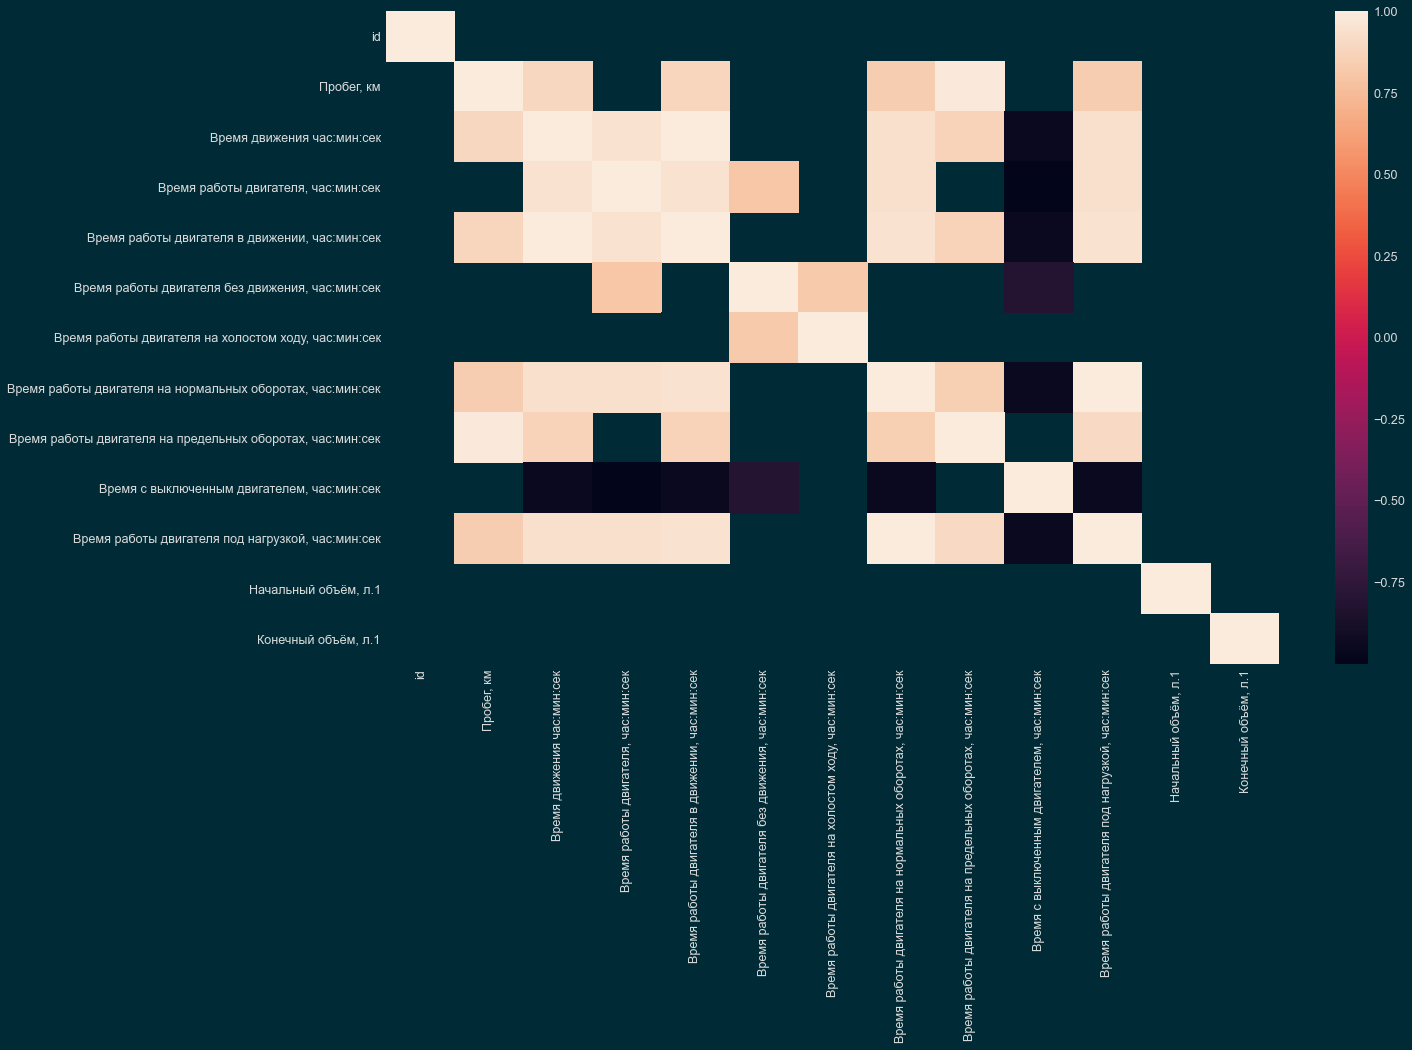

In [15]:
fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(search[abs(search) > 0.8], ax=ax)

In [16]:
data['Дата'] = pd.to_datetime(data['Дата'], dayfirst=True)

In [17]:
data.sort_values(by='Дата', inplace=True)

In [18]:
data

id       Дата  Пробег, км  Время движения час:мин:сек  \
0     734 2021-06-01         NaN                         NaN   
330   928 2021-06-01         NaN                         NaN   
600   939 2021-06-01        0.09                         NaN   
630   671 2021-06-01       85.32                     26692.0   
900   728 2021-06-01         NaN                         NaN   
...   ...        ...         ...                         ...   
689   786 2021-06-30         NaN                         NaN   
659   671 2021-06-30      248.03                     47025.0   
629   939 2021-06-30       67.20                     17090.0   
839   661 2021-06-30         NaN                         NaN   
1199  891 2021-06-30       18.56                      9218.0   

      Время работы двигателя, час:мин:сек  \
0                                     NaN   
330                                   NaN   
600                                   NaN   
630                               43536.0   
900                                   NaN   
...                                   ...   
689                                   NaN   
659                               55604.0   
629                               28353.0   
839                                   NaN   
1199                              30630.0   

      Время работы двигателя в движении, час:мин:сек  \
0                                                NaN   
330                                              NaN   
600                                              NaN   
630                                          26592.0   
900                                              NaN   
...                                              ...   
689                                              NaN   
659                                          46921.0   
629                                          17090.0   
839                                              NaN   
1199                                          9089.0   

      Время работы двигателя без движения, час:мин:сек  \
0                                                  NaN   
330                                                NaN   
600                                                NaN   
630                                            16944.0   
900                                                NaN   
...                                                ...   
689                                                NaN   
659                                             8683.0   
629                                            11263.0   
839                                                NaN   
1199                                           21541.0   

      Время работы двигателя на холостом ходу, час:мин:сек  \
0                                                   NaN      
330                                                 NaN      
600                                                 NaN      
630                                                 NaN      
900                                                 NaN      
...                                                 ...      
689                                                 NaN      
659                                                 NaN      
629                                              8339.0      
839                                                 NaN      
1199                                            30630.0      

      Время работы двигателя на нормальных оборотах, час:мин:сек  \
0                                                   NaN            
330                                                 NaN            
600                                                 NaN            
630                                             43536.0            
900                                                 NaN            
...                                                 ...            
689                                                 NaN            
659                                   

In [19]:
data.loc[data['id'] == 891]

id       Дата  Пробег, км  Время движения час:мин:сек  \
1170  891 2021-06-01        0.41                       329.0   
1171  891 2021-06-02       37.28                     12707.0   
1172  891 2021-06-03      194.50                     27307.0   
1173  891 2021-06-04       19.32                      6570.0   
1174  891 2021-06-05       18.69                      6855.0   
1175  891 2021-06-06       97.34                     14978.0   
1176  891 2021-06-07       14.45                      6547.0   
1177  891 2021-06-08       11.25                      6865.0   
1178  891 2021-06-09       21.27                      8246.0   
1179  891 2021-06-10       16.35                      7506.0   
1180  891 2021-06-11       54.47                     17422.0   
1181  891 2021-06-12       15.64                      6021.0   
1182  891 2021-06-13       22.69                      9196.0   
1183  891 2021-06-14       27.71                     11139.0   
1184  891 2021-06-15       20.39                      9830.0   
1185  891 2021-06-16       41.75                     14555.0   
1186  891 2021-06-17       49.60                     20625.0   
1187  891 2021-06-18       50.43                     17464.0   
1188  891 2021-06-19       56.30                     19758.0   
1189  891 2021-06-20       44.36                     14232.0   
1190  891 2021-06-21       27.14                      9240.0   
1191  891 2021-06-22       16.06                      7981.0   
1192  891 2021-06-23       22.81                     11047.0   
1193  891 2021-06-24       17.52                      7991.0   
1194  891 2021-06-25        3.18                       986.0   
1195  891 2021-06-26        8.08                      4134.0   
1196  891 2021-06-27       22.90                     13399.0   
1197  891 2021-06-28       17.47                      8938.0   
1198  891 2021-06-29       26.59                     12164.0   
1199  891 2021-06-30       18.56                      9218.0   

      Время работы двигателя, час:мин:сек  \
1170                               3939.0   
1171                              30786.0   
1172                              17723.0   
1173                                  NaN   
1174                                198.0   
1175                              12347.0   
1176                              16671.0   
1177                              23044.0   
1178                              23648.0   
1179                              24021.0   
1180                              27668.0   
1181                              38070.0   
1182                              33347.0   
1183                              37654.0   
1184                              28468.0   
1185                              32010.0   
1186                              54724.0   
1187                              44455.0   
1188                              48478.0   
1189                              31327.0   
1190                              30422.0   
1191                              38807.0   
1192                              32136.0   
1193                              27587.0   
1194                               5941.0   
1195                               9908.0   
1196                              28260.0   
1197                              30790.0   
1198                              30897.0   
1199                              30630.0   

      Время работы двигателя в движении, час:мин:сек  \
1170                                           222.0   
1171                                         12543.0   
1172                                         16488.0   
1173                                             NaN   
1174                                           198.0   
1175                                         10577.0   
1176                                          6474.0   
1177                                          6716.0   
1178                                          8246.0   
1179                                          7476.0   
1180      

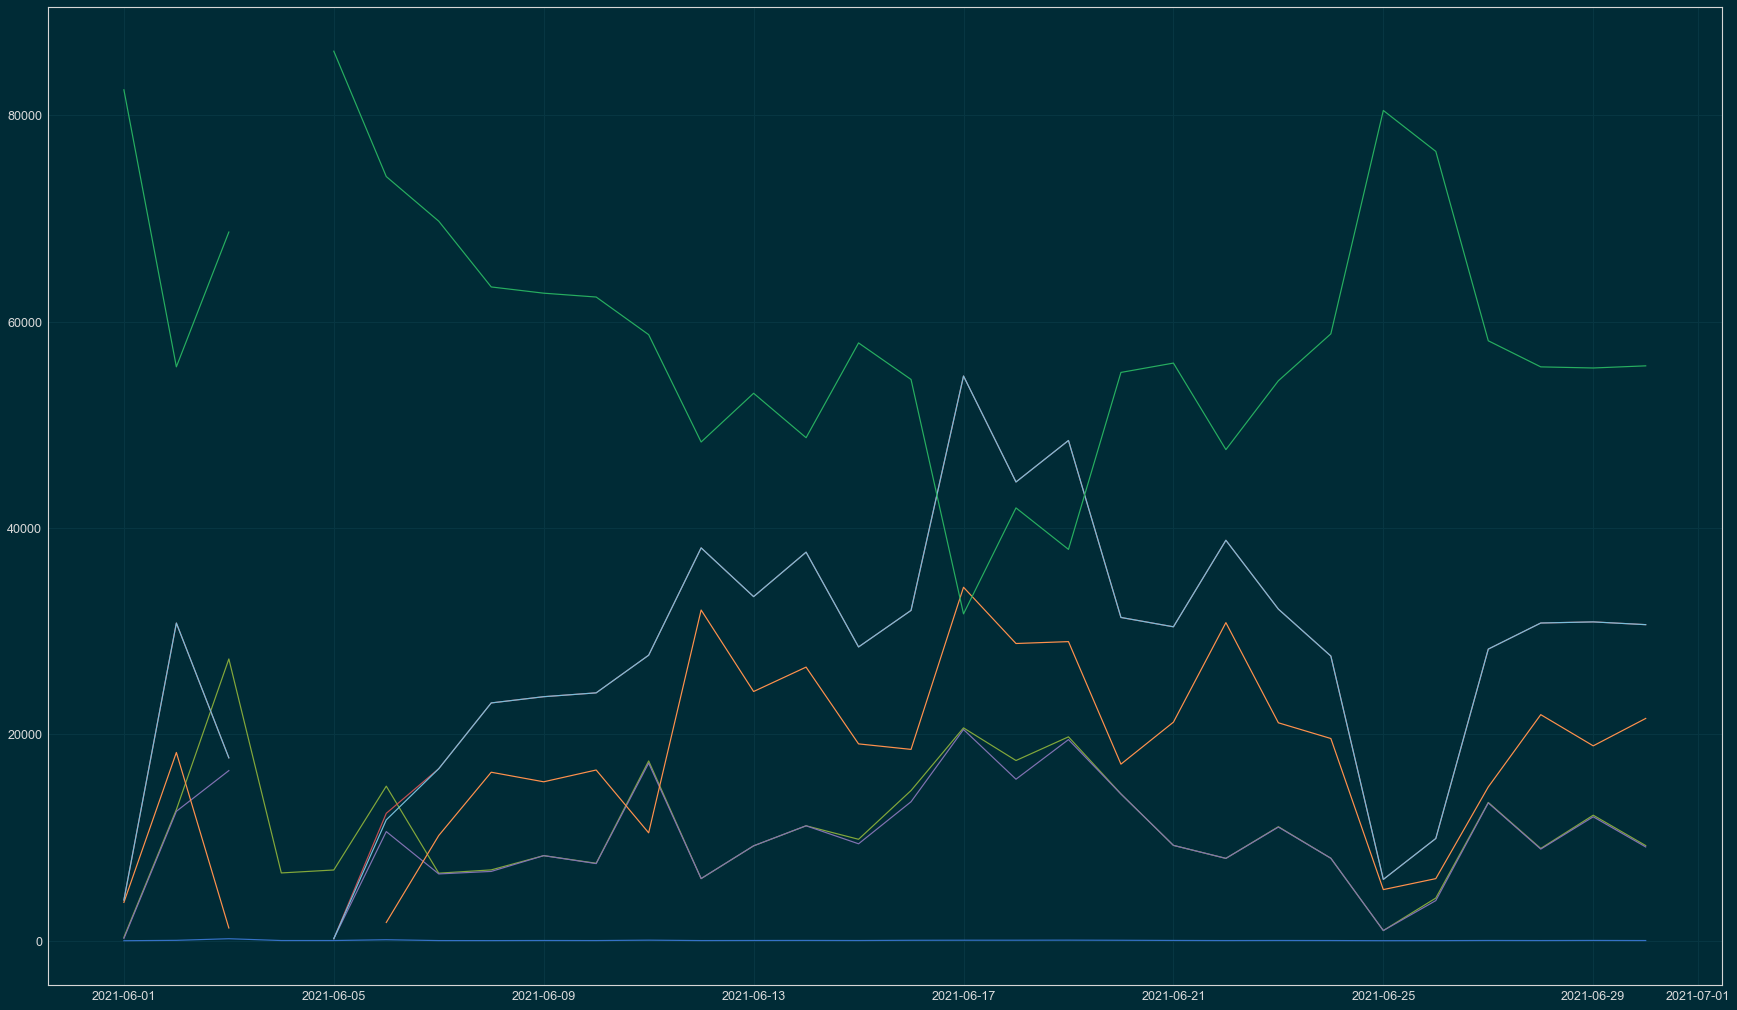

In [20]:
mask = (data['id'] == 891)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

In [21]:
data.isnull().sum()

id                                                               0
Дата                                                             0
Пробег, км                                                     809
Время движения час:мин:сек                                     857
Время работы двигателя, час:мин:сек                            854
Время работы двигателя в движении, час:мин:сек                 858
Время работы двигателя без движения, час:мин:сек               855
Время работы двигателя на холостом ходу, час:мин:сек           884
Время работы двигателя на нормальных оборотах, час:мин:сек     883
Время работы двигателя на предельных оборотах, час:мин:сек    1195
Время с выключенным двигателем, час:мин:сек                    847
Время работы двигателя под нагрузкой, час:мин:сек              883
Начальный объём, л.1                                          1176
Конечный объём, л.1                                           1176
dtype: int64

In [22]:
data.notna().sum()

id                                                            1200
Дата                                                          1200
Пробег, км                                                     391
Время движения час:мин:сек                                     343
Время работы двигателя, час:мин:сек                            346
Время работы двигателя в движении, час:мин:сек                 342
Время работы двигателя без движения, час:мин:сек               345
Время работы двигателя на холостом ходу, час:мин:сек           316
Время работы двигателя на нормальных оборотах, час:мин:сек     317
Время работы двигателя на предельных оборотах, час:мин:сек       5
Время с выключенным двигателем, час:мин:сек                    353
Время работы двигателя под нагрузкой, час:мин:сек              317
Начальный объём, л.1                                            24
Конечный объём, л.1                                             24
dtype: int64

In [23]:
data['id'].unique(), len(data['id'].unique())

(array([734, 928, 939, 671, 728, 681, 113, 786, 606, 585, 154, 877, 915,
        230, 298, 740, 757, 612, 837, 106, 661, 411, 805, 891, 969, 158,
        410, 638, 916, 123, 885, 788, 471, 242, 578, 930, 341, 982, 155,
        783], dtype=int64),
 40)

In [24]:
len(data['Дата'].unique())

30

- тракторов 40 шт.
- 30 дней

In [25]:
#на предельных оборотах работал только один трактор или инфа только по одному
data[data['Время работы двигателя на предельных оборотах, час:мин:сек'].notna()]

id       Дата  Пробег, км  Время движения час:мин:сек  \
309  113 2021-06-10       26.99                      4812.0   
311  113 2021-06-12      113.27                      7429.0   
312  113 2021-06-13       11.55                      1393.0   
313  113 2021-06-14      123.79                      7196.0   
318  113 2021-06-19       14.64                      1797.0   

     Время работы двигателя, час:мин:сек  \
309                               6310.0   
311                               8396.0   
312                               2284.0   
313                               7710.0   
318                               2139.0   

     Время работы двигателя в движении, час:мин:сек  \
309                                          4812.0   
311                                          7429.0   
312                                          1393.0   
313                                          7193.0   
318                                          1797.0   

     Время работы двигателя без движения, час:мин:сек  \
309                                            1498.0   
311                                             967.0   
312                                             891.0   
313                                             517.0   
318                                             342.0   

     Время работы двигателя на холостом ходу, час:мин:сек  \
309                                             2150.0      
311                                              589.0      
312                                              809.0      
313                                              670.0      
318                                              255.0      

     Время работы двигателя на нормальных оборотах, час:мин:сек  \
309                                             4156.0            
311                                             6756.0            
312                                             1462.0            
313                                             5740.0            
318                                             1860.0            

     Время работы двигателя на предельных оборотах, час:мин:сек  \
309                                                4.0            
311                                             1051.0            
312                                               13.0            
313                                             1300.0            
318                                               24.0            

     Время с выключенным двигателем, час:мин:сек  \
309                                      80090.0   
311                                      78004.0   
312                                      84116.0   
313                                      78690.0   
318                                      84261.0   

     Время работы двигателя под нагрузкой, час:мин:сек  Начальный объём, л.1  \
309                                             4160.0                   NaN   
311                                             7807.0                   NaN   
312                                             1475.0                   NaN   
313                                             7040.0                   NaN   
318                                             1884.0                   NaN   

     Конечный объём, л.1  
309                  NaN  
311                  NaN  
312                  NaN  
313                  NaN  
318                  NaN

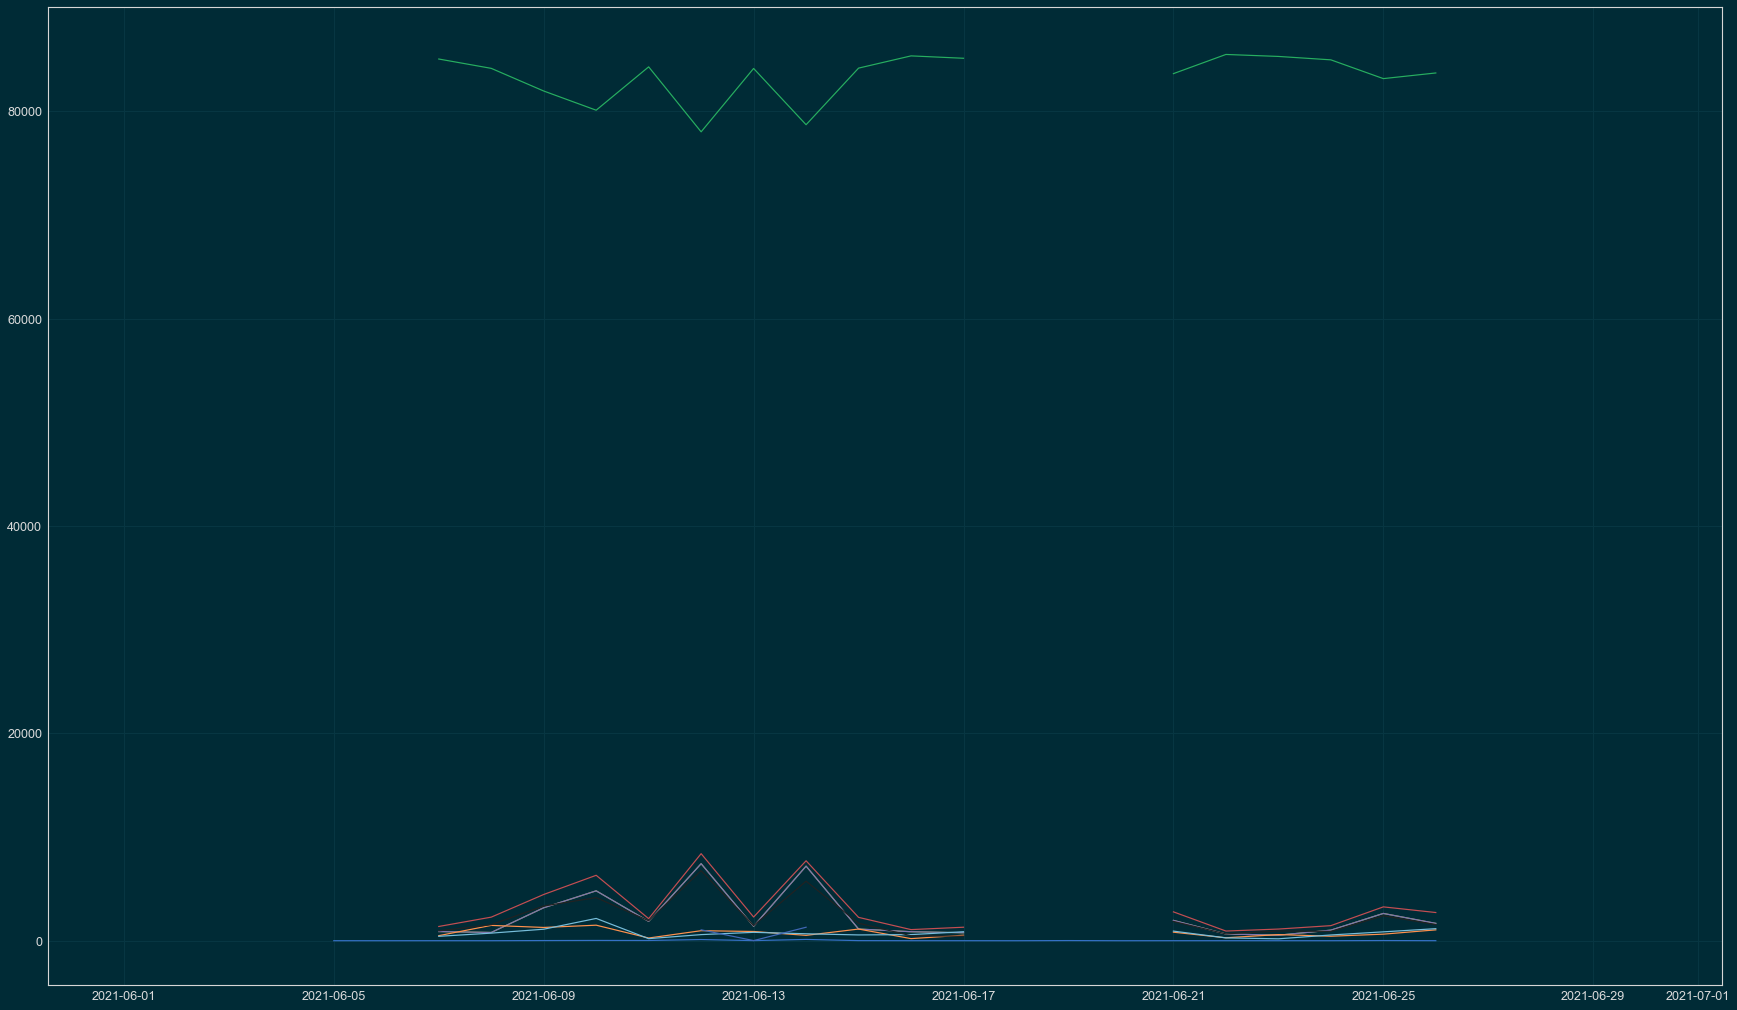

In [26]:
mask = (data['id'] == 113)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

In [27]:
#изменение объема топлива только у одного трактора
data[data['Начальный объём, л.1'].notna()]

id       Дата  Пробег, км  Время движения час:мин:сек  \
3   734 2021-06-04         NaN                         NaN   
4   734 2021-06-05        0.49                       668.0   
5   734 2021-06-06        0.15                        97.0   
9   734 2021-06-10         NaN                         NaN   
10  734 2021-06-11        0.29                       292.0   
11  734 2021-06-12        0.21                       165.0   
12  734 2021-06-13        0.37                       390.0   
13  734 2021-06-14        0.08                        82.0   
14  734 2021-06-15        0.26                       281.0   
15  734 2021-06-16         NaN                         NaN   
16  734 2021-06-17        0.30                       274.0   
17  734 2021-06-18        0.01                         NaN   
18  734 2021-06-19        0.80                       343.0   
19  734 2021-06-20        0.23                       454.0   
20  734 2021-06-21        0.16                         NaN   
21  734 2021-06-22       67.41                      6838.0   
22  734 2021-06-23        0.31                       440.0   
23  734 2021-06-24        0.12                        65.0   
24  734 2021-06-25       66.20                      6009.0   
25  734 2021-06-26        0.38                       402.0   
26  734 2021-06-27        0.15                       215.0   
27  734 2021-06-28        0.21                        54.0   
28  734 2021-06-29        0.17                       150.0   
29  734 2021-06-30        0.45                       309.0   

    Время работы двигателя, час:мин:сек  \
3                                   NaN   
4                                9304.0   
5                               16489.0   
9                                   NaN   
10                              11352.0   
11                              18323.0   
12                              14585.0   
13                               7855.0   
14                              12472.0   
15                                  NaN   
16                              12507.0   
17                               7191.0   
18                              11130.0   
19                               6461.0   
20                              12579.0   
21                              13446.0   
22                               6544.0   
23                              11955.0   
24                              16595.0   
25                               8408.0   
26                               1842.0   
27                              11438.0   
28                               6793.0   
29                               4252.0   

    Время работы двигателя в движении, час:мин:сек  \
3                                              NaN   
4                                            668.0   
5                                             82.0   
9                                              NaN   
10                                           292.0   
11                                           165.0   
12                                           390.0   
13                                            82.0   
14                                           281.0   
15                                             NaN   
16                                           274.0   
17                                             NaN   
18                                           334.0   
19                                           454.0   
20                                             NaN   
21                                          6798.0   
22                                           435.0   
23                                            60.0   
24                                          5994.0   
25                                           402.0   
26                                           215.0   
27                                            52.0   
28                                           150.0   
29                                           284.0   

    Время работы двигателя 

In [28]:
data['Разность топлива'] = data['Начальный объём, л.1'] - data['Конечный объём, л.1']
data

id       Дата  Пробег, км  Время движения час:мин:сек  \
0     734 2021-06-01         NaN                         NaN   
330   928 2021-06-01         NaN                         NaN   
600   939 2021-06-01        0.09                         NaN   
630   671 2021-06-01       85.32                     26692.0   
900   728 2021-06-01         NaN                         NaN   
...   ...        ...         ...                         ...   
689   786 2021-06-30         NaN                         NaN   
659   671 2021-06-30      248.03                     47025.0   
629   939 2021-06-30       67.20                     17090.0   
839   661 2021-06-30         NaN                         NaN   
1199  891 2021-06-30       18.56                      9218.0   

      Время работы двигателя, час:мин:сек  \
0                                     NaN   
330                                   NaN   
600                                   NaN   
630                               43536.0   
900                                   NaN   
...                                   ...   
689                                   NaN   
659                               55604.0   
629                               28353.0   
839                                   NaN   
1199                              30630.0   

      Время работы двигателя в движении, час:мин:сек  \
0                                                NaN   
330                                              NaN   
600                                              NaN   
630                                          26592.0   
900                                              NaN   
...                                              ...   
689                                              NaN   
659                                          46921.0   
629                                          17090.0   
839                                              NaN   
1199                                          9089.0   

      Время работы двигателя без движения, час:мин:сек  \
0                                                  NaN   
330                                                NaN   
600                                                NaN   
630                                            16944.0   
900                                                NaN   
...                                                ...   
689                                                NaN   
659                                             8683.0   
629                                            11263.0   
839                                                NaN   
1199                                           21541.0   

      Время работы двигателя на холостом ходу, час:мин:сек  \
0                                                   NaN      
330                                                 NaN      
600                                                 NaN      
630                                                 NaN      
900                                                 NaN      
...                                                 ...      
689                                                 NaN      
659                                                 NaN      
629                                              8339.0      
839                                                 NaN      
1199                                            30630.0      

      Время работы двигателя на нормальных оборотах, час:мин:сек  \
0                                                   NaN            
330                                                 NaN            
600                                                 NaN            
630                                             43536.0            
900                                                 NaN            
...                                                 ...            
689                                                 NaN            
659                                   

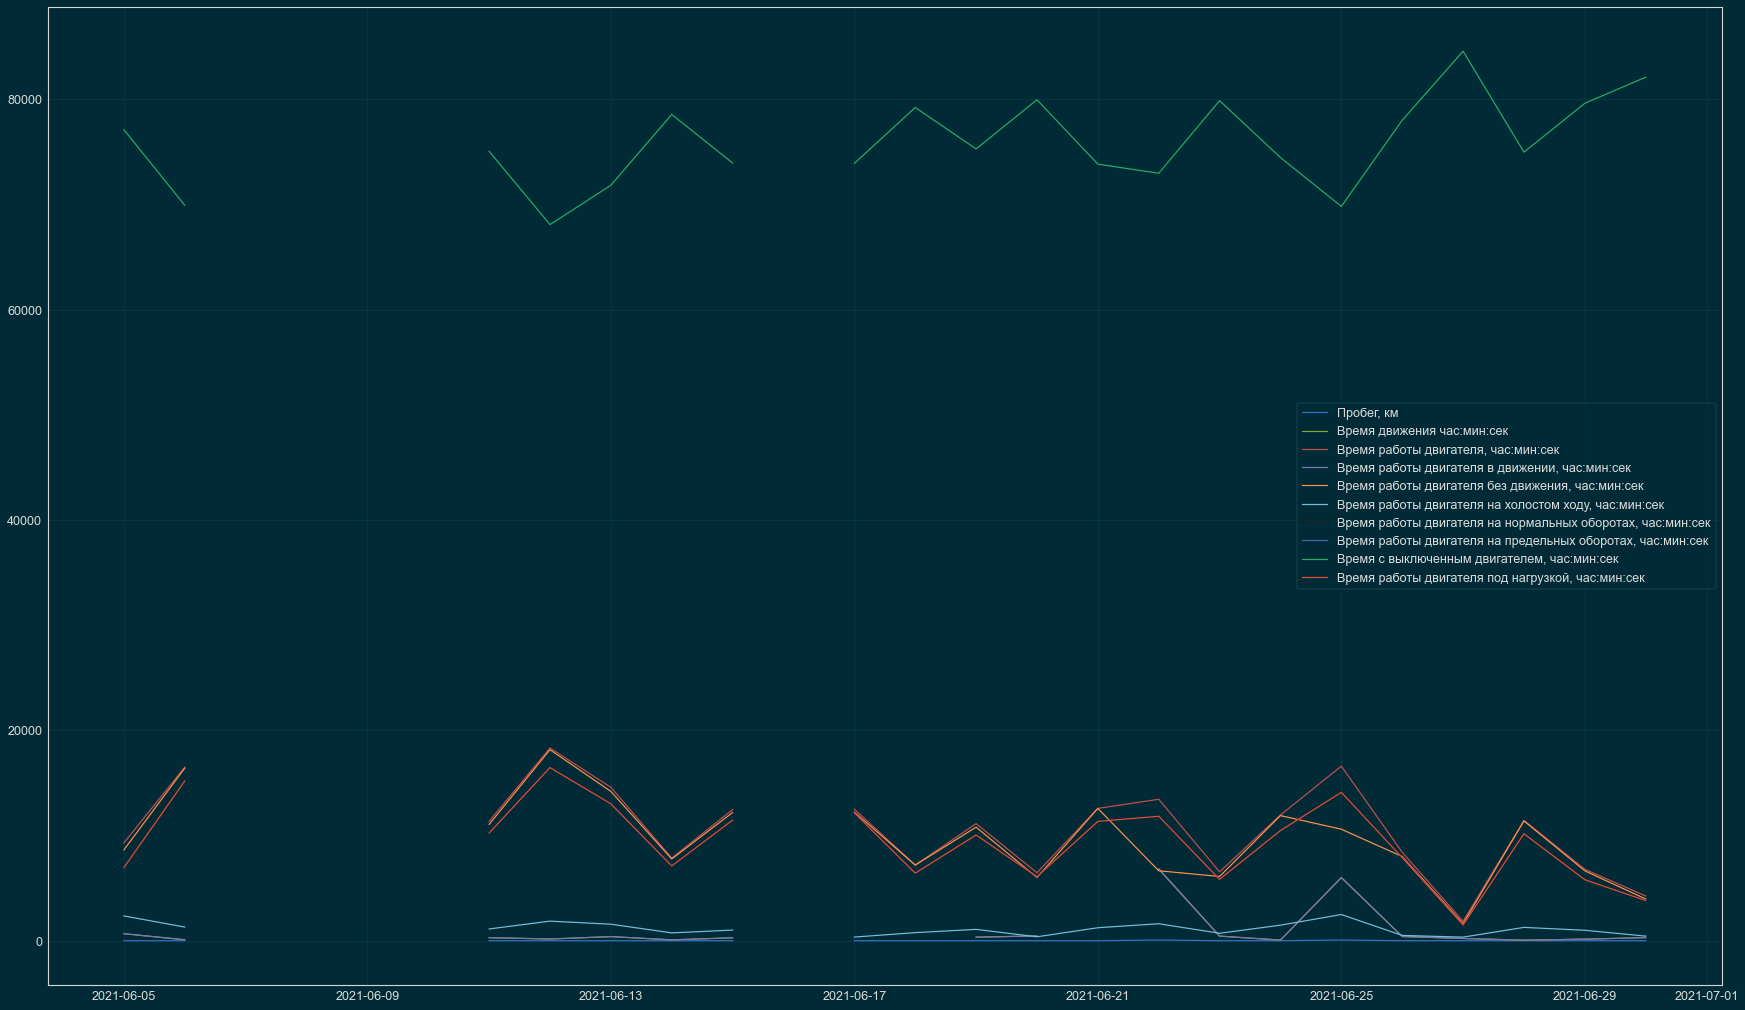

In [29]:
mask = (data['id'] == 734)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');
plt.legend(data.columns[2:])

In [30]:
print(len(data[data['Пробег, км'].notna() & data['Время движения час:мин:сек'].isna()]))
data[data['Пробег, км'].notna() & data['Время движения час:мин:сек'].isna()]

48


id       Дата  Пробег, км  Время движения час:мин:сек  \
600   939 2021-06-01        0.09                         NaN   
1110  681 2021-06-01        0.02                         NaN   
601   939 2021-06-02        0.09                         NaN   
1111  681 2021-06-02        0.15                         NaN   
602   939 2021-06-03        0.03                         NaN   
1112  681 2021-06-03        0.09                         NaN   
603   939 2021-06-04        0.03                         NaN   
1113  681 2021-06-04        0.04                         NaN   
1114  681 2021-06-05        0.10                         NaN   
1115  681 2021-06-06        0.05                         NaN   
305   113 2021-06-06        0.02                         NaN   
1116  681 2021-06-07        0.04                         NaN   
877   411 2021-06-08        1.30                         NaN   
1117  681 2021-06-08        0.04                         NaN   
1118  681 2021-06-09        0.05                         NaN   
1119  681 2021-06-10        0.06                         NaN   
1120  681 2021-06-11        0.07                         NaN   
1121  681 2021-06-12        0.12                         NaN   
1122  681 2021-06-13        0.01                         NaN   
1123  681 2021-06-14        0.13                         NaN   
1124  681 2021-06-15        0.08                         NaN   
1125  681 2021-06-16        0.01                         NaN   
615   939 2021-06-16        0.03                         NaN   
1126  681 2021-06-17        0.02                         NaN   
616   939 2021-06-17        0.02                         NaN   
17    734 2021-06-18        0.01                         NaN   
617   939 2021-06-18        0.10                         NaN   
1127  681 2021-06-18        0.04                         NaN   
317   113 2021-06-18        0.05                         NaN   
618   939 2021-06-19        0.06                         NaN   
319   113 2021-06-20        0.02                         NaN   
1129  681 2021-06-20        0.09                         NaN   
1130  681 2021-06-21        0.12                         NaN   
20    734 2021-06-21        0.16                         NaN   
1131  681 2021-06-22        0.06                         NaN   
621   939 2021-06-22        0.08                         NaN   
622   939 2021-06-23        0.01                         NaN   
1132  681 2021-06-23        0.09                         NaN   
1133  681 2021-06-24        0.03                         NaN   
623   939 2021-06-24        0.01                         NaN   
624   939 2021-06-25        0.04                         NaN   
1135  681 2021-06-26        0.02                         NaN   
655   671 2021-06-26        0.28                         NaN   
1136  681 2021-06-27        0.03                         NaN   
1137  681 2021-06-28        0.01                         NaN   
327   113 2021-06-28        0.04                         NaN   
1138  681 2021-06-29        0.02                         NaN   
329   113 2021-06-30        0.01                         NaN   

      Время работы двигателя, час:мин:сек  \
600                                   NaN   
1110                                  NaN   
601                                   NaN   
1111                                  NaN   
602                                   NaN   
1112                                  NaN   
603                                   NaN   
1113                                  NaN   
1114                                  NaN   
1115                                  NaN   
305                                   NaN   
1116                                  NaN   
877                                   NaN   
1117                                  NaN   
1118                                  NaN   
1119                                  NaN   
1120                                  NaN   
1121                                  NaN   
1122           

In [31]:
print(len(data[data['Пробег, км'].notna() & data['Время движения час:мин:сек'].isna() & data['Время работы двигателя, час:мин:сек'].notna()]))
data[data['Пробег, км'].notna() & data['Время движения час:мин:сек'].isna() & data['Время работы двигателя, час:мин:сек'].notna()]

4


id       Дата  Пробег, км  Время движения час:мин:сек  \
17   734 2021-06-18        0.01                         NaN   
20   734 2021-06-21        0.16                         NaN   
655  671 2021-06-26        0.28                         NaN   
329  113 2021-06-30        0.01                         NaN   

     Время работы двигателя, час:мин:сек  \
17                                7191.0   
20                               12579.0   
655                               1441.0   
329                                560.0   

     Время работы двигателя в движении, час:мин:сек  \
17                                              NaN   
20                                              NaN   
655                                             NaN   
329                                             NaN   

     Время работы двигателя без движения, час:мин:сек  \
17                                             7191.0   
20                                            12579.0   
655                                            1441.0   
329                                             560.0   

     Время работы двигателя на холостом ходу, час:мин:сек  \
17                                               769.0      
20                                              1236.0      
655                                                NaN      
329                                              560.0      

     Время работы двигателя на нормальных оборотах, час:мин:сек  \
17                                              6422.0            
20                                             11343.0            
655                                             1441.0            
329                                                NaN            

     Время работы двигателя на предельных оборотах, час:мин:сек  \
17                                                 NaN            
20                                                 NaN            
655                                                NaN            
329                                                NaN            

     Время с выключенным двигателем, час:мин:сек  \
17                                       79209.0   
20                                       73821.0   
655                                      84959.0   
329                                      85780.0   

     Время работы двигателя под нагрузкой, час:мин:сек  Начальный объём, л.1  \
17                                              6422.0                 180.2   
20                                             11343.0                  74.0   
655                                             1441.0                   NaN   
329                                                NaN                   NaN   

     Конечный объём, л.1  Разность топлива  
17                 157.6              22.6  
20                 436.7            -362.7  
655                  NaN               NaN  
329                  NaN               NaN

In [32]:
data['Время движения час:мин:сек'].min(), data['Время движения час:мин:сек'].max()

(32.0, 52920.0)

In [33]:
print(len(data[data['Разность топлива'] < 0 ]))
data[data['Разность топлива'] < 0]

2


id       Дата  Пробег, км  Время движения час:мин:сек  \
20  734 2021-06-21        0.16                         NaN   
26  734 2021-06-27        0.15                       215.0   

    Время работы двигателя, час:мин:сек  \
20                              12579.0   
26                               1842.0   

    Время работы двигателя в движении, час:мин:сек  \
20                                             NaN   
26                                           215.0   

    Время работы двигателя без движения, час:мин:сек  \
20                                           12579.0   
26                                            1627.0   

    Время работы двигателя на холостом ходу, час:мин:сек  \
20                                             1236.0      
26                                              341.0      

    Время работы двигателя на нормальных оборотах, час:мин:сек  \
20                                            11343.0            
26                                             1501.0            

    Время работы двигателя на предельных оборотах, час:мин:сек  \
20                                                NaN            
26                                                NaN            

    Время с выключенным двигателем, час:мин:сек  \
20                                      73821.0   
26                                      84558.0   

    Время работы двигателя под нагрузкой, час:мин:сек  Начальный объём, л.1  \
20                                            11343.0                  74.0   
26                                             1501.0                 146.8   

    Конечный объём, л.1  Разность топлива  
20                436.7            -362.7  
26                496.8            -350.0

In [34]:
print(len(data[data['Разность топлива'] == 0 ]))
data[data['Разность топлива'] == 0]

3


id       Дата  Пробег, км  Время движения час:мин:сек  \
3   734 2021-06-04         NaN                         NaN   
9   734 2021-06-10         NaN                         NaN   
15  734 2021-06-16         NaN                         NaN   

    Время работы двигателя, час:мин:сек  \
3                                   NaN   
9                                   NaN   
15                                  NaN   

    Время работы двигателя в движении, час:мин:сек  \
3                                              NaN   
9                                              NaN   
15                                             NaN   

    Время работы двигателя без движения, час:мин:сек  \
3                                                NaN   
9                                                NaN   
15                                               NaN   

    Время работы двигателя на холостом ходу, час:мин:сек  \
3                                                 NaN      
9                                                 NaN      
15                                                NaN      

    Время работы двигателя на нормальных оборотах, час:мин:сек  \
3                                                 NaN            
9                                                 NaN            
15                                                NaN            

    Время работы двигателя на предельных оборотах, час:мин:сек  \
3                                                 NaN            
9                                                 NaN            
15                                                NaN            

    Время с выключенным двигателем, час:мин:сек  \
3                                           NaN   
9                                           NaN   
15                                          NaN   

    Время работы двигателя под нагрузкой, час:мин:сек  Начальный объём, л.1  \
3                                                 NaN                 277.4   
9                                                 NaN                 474.6   
15                                                NaN                 241.5   

    Конечный объём, л.1  Разность топлива  
3                 277.4               0.0  
9                 474.6               0.0  
15                241.5               0.0

In [35]:
print('Начальный датасет размером 1200')
data = data[data['Разность топлива'] != 0]
print(len(data))
#4, 10 и 16 июня трактор 734 не работал

Начальный датасет размером 1200
1197


In [36]:
print(len(data[data['Разность топлива'] > 0 ]))
data1 = data[data['Разность топлива'] > 0]
data1

19


id       Дата  Пробег, км  Время движения час:мин:сек  \
4   734 2021-06-05        0.49                       668.0   
5   734 2021-06-06        0.15                        97.0   
10  734 2021-06-11        0.29                       292.0   
11  734 2021-06-12        0.21                       165.0   
12  734 2021-06-13        0.37                       390.0   
13  734 2021-06-14        0.08                        82.0   
14  734 2021-06-15        0.26                       281.0   
16  734 2021-06-17        0.30                       274.0   
17  734 2021-06-18        0.01                         NaN   
18  734 2021-06-19        0.80                       343.0   
19  734 2021-06-20        0.23                       454.0   
21  734 2021-06-22       67.41                      6838.0   
22  734 2021-06-23        0.31                       440.0   
23  734 2021-06-24        0.12                        65.0   
24  734 2021-06-25       66.20                      6009.0   
25  734 2021-06-26        0.38                       402.0   
27  734 2021-06-28        0.21                        54.0   
28  734 2021-06-29        0.17                       150.0   
29  734 2021-06-30        0.45                       309.0   

    Время работы двигателя, час:мин:сек  \
4                                9304.0   
5                               16489.0   
10                              11352.0   
11                              18323.0   
12                              14585.0   
13                               7855.0   
14                              12472.0   
16                              12507.0   
17                               7191.0   
18                              11130.0   
19                               6461.0   
21                              13446.0   
22                               6544.0   
23                              11955.0   
24                              16595.0   
25                               8408.0   
27                              11438.0   
28                               6793.0   
29                               4252.0   

    Время работы двигателя в движении, час:мин:сек  \
4                                            668.0   
5                                             82.0   
10                                           292.0   
11                                           165.0   
12                                           390.0   
13                                            82.0   
14                                           281.0   
16                                           274.0   
17                                             NaN   
18                                           334.0   
19                                           454.0   
21                                          6798.0   
22                                           435.0   
23                                            60.0   
24                                          5994.0   
25                                           402.0   
27                                            52.0   
28                                           150.0   
29                                           284.0   

    Время работы двигателя без движения, час:мин:сек  \
4                                             8636.0   
5                                            16407.0   
10                                           11060.0   
11                                           18158.0   
12                                           14195.0   
13                                            7773.0   
14                                           12191.0   
16                                           12233.0   
17                                            7191.0   
18                                           10796.0   
19                                            6007.0   
21                                            6648.0   
22                                            6109.0   
23                                    

In [37]:
x = data1['Пробег, км']*1000/data1['Время движения час:мин:сек']
x

4      0.733533
5      1.546392
10     0.993151
11     1.272727
12     0.948718
13     0.975610
14     0.925267
16     1.094891
17          NaN
18     2.332362
19     0.506608
21     9.858146
22     0.704545
23     1.846154
24    11.016808
25     0.945274
27     3.888889
28     1.133333
29     1.456311
dtype: float64

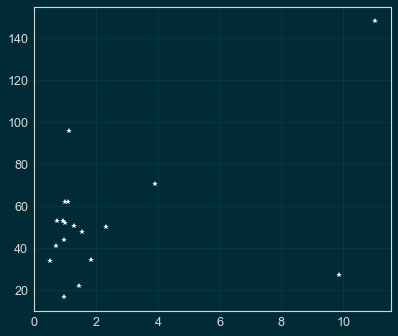

In [38]:
plt.plot(x, data1['Разность топлива'], '*w')

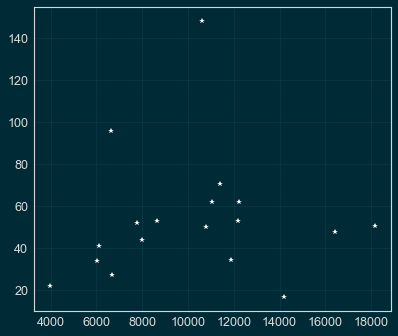

In [39]:
plt.plot(x+data1['Время работы двигателя без движения, час:мин:сек'], data1['Разность топлива'], '*w')

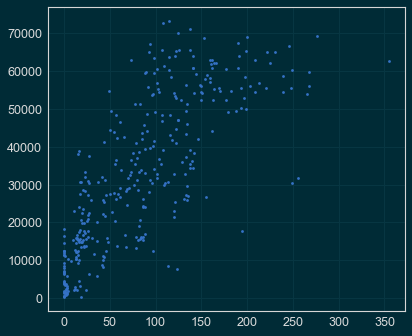

In [40]:
plt.plot(data['Пробег, км'], data['Время работы двигателя, час:мин:сек'], '.')

In [41]:
data_copy = data.copy()
data_copy

id       Дата  Пробег, км  Время движения час:мин:сек  \
0     734 2021-06-01         NaN                         NaN   
330   928 2021-06-01         NaN                         NaN   
600   939 2021-06-01        0.09                         NaN   
630   671 2021-06-01       85.32                     26692.0   
900   728 2021-06-01         NaN                         NaN   
...   ...        ...         ...                         ...   
689   786 2021-06-30         NaN                         NaN   
659   671 2021-06-30      248.03                     47025.0   
629   939 2021-06-30       67.20                     17090.0   
839   661 2021-06-30         NaN                         NaN   
1199  891 2021-06-30       18.56                      9218.0   

      Время работы двигателя, час:мин:сек  \
0                                     NaN   
330                                   NaN   
600                                   NaN   
630                               43536.0   
900                                   NaN   
...                                   ...   
689                                   NaN   
659                               55604.0   
629                               28353.0   
839                                   NaN   
1199                              30630.0   

      Время работы двигателя в движении, час:мин:сек  \
0                                                NaN   
330                                              NaN   
600                                              NaN   
630                                          26592.0   
900                                              NaN   
...                                              ...   
689                                              NaN   
659                                          46921.0   
629                                          17090.0   
839                                              NaN   
1199                                          9089.0   

      Время работы двигателя без движения, час:мин:сек  \
0                                                  NaN   
330                                                NaN   
600                                                NaN   
630                                            16944.0   
900                                                NaN   
...                                                ...   
689                                                NaN   
659                                             8683.0   
629                                            11263.0   
839                                                NaN   
1199                                           21541.0   

      Время работы двигателя на холостом ходу, час:мин:сек  \
0                                                   NaN      
330                                                 NaN      
600                                                 NaN      
630                                                 NaN      
900                                                 NaN      
...                                                 ...      
689                                                 NaN      
659                                                 NaN      
629                                              8339.0      
839                                                 NaN      
1199                                            30630.0      

      Время работы двигателя на нормальных оборотах, час:мин:сек  \
0                                                   NaN            
330                                                 NaN            
600                                                 NaN            
630                                             43536.0            
900                                                 NaN            
...                                                 ...            
689                                                 NaN            
659                                   

In [42]:
data_copy.drop(columns = ['Время работы двигателя на предельных оборотах, час:мин:сек', 'Начальный объём, л.1', 'Конечный объём, л.1'],  axis=1, inplace=True)
data_copy

id       Дата  Пробег, км  Время движения час:мин:сек  \
0     734 2021-06-01         NaN                         NaN   
330   928 2021-06-01         NaN                         NaN   
600   939 2021-06-01        0.09                         NaN   
630   671 2021-06-01       85.32                     26692.0   
900   728 2021-06-01         NaN                         NaN   
...   ...        ...         ...                         ...   
689   786 2021-06-30         NaN                         NaN   
659   671 2021-06-30      248.03                     47025.0   
629   939 2021-06-30       67.20                     17090.0   
839   661 2021-06-30         NaN                         NaN   
1199  891 2021-06-30       18.56                      9218.0   

      Время работы двигателя, час:мин:сек  \
0                                     NaN   
330                                   NaN   
600                                   NaN   
630                               43536.0   
900                                   NaN   
...                                   ...   
689                                   NaN   
659                               55604.0   
629                               28353.0   
839                                   NaN   
1199                              30630.0   

      Время работы двигателя в движении, час:мин:сек  \
0                                                NaN   
330                                              NaN   
600                                              NaN   
630                                          26592.0   
900                                              NaN   
...                                              ...   
689                                              NaN   
659                                          46921.0   
629                                          17090.0   
839                                              NaN   
1199                                          9089.0   

      Время работы двигателя без движения, час:мин:сек  \
0                                                  NaN   
330                                                NaN   
600                                                NaN   
630                                            16944.0   
900                                                NaN   
...                                                ...   
689                                                NaN   
659                                             8683.0   
629                                            11263.0   
839                                                NaN   
1199                                           21541.0   

      Время работы двигателя на холостом ходу, час:мин:сек  \
0                                                   NaN      
330                                                 NaN      
600                                                 NaN      
630                                                 NaN      
900                                                 NaN      
...                                                 ...      
689                                                 NaN      
659                                                 NaN      
629                                              8339.0      
839                                                 NaN      
1199                                            30630.0      

      Время работы двигателя на нормальных оборотах, час:мин:сек  \
0                                                   NaN            
330                                                 NaN            
600                                                 NaN            
630                                             43536.0            
900                                                 NaN            
...                                                 ...            
689                                                 NaN            
659                                   

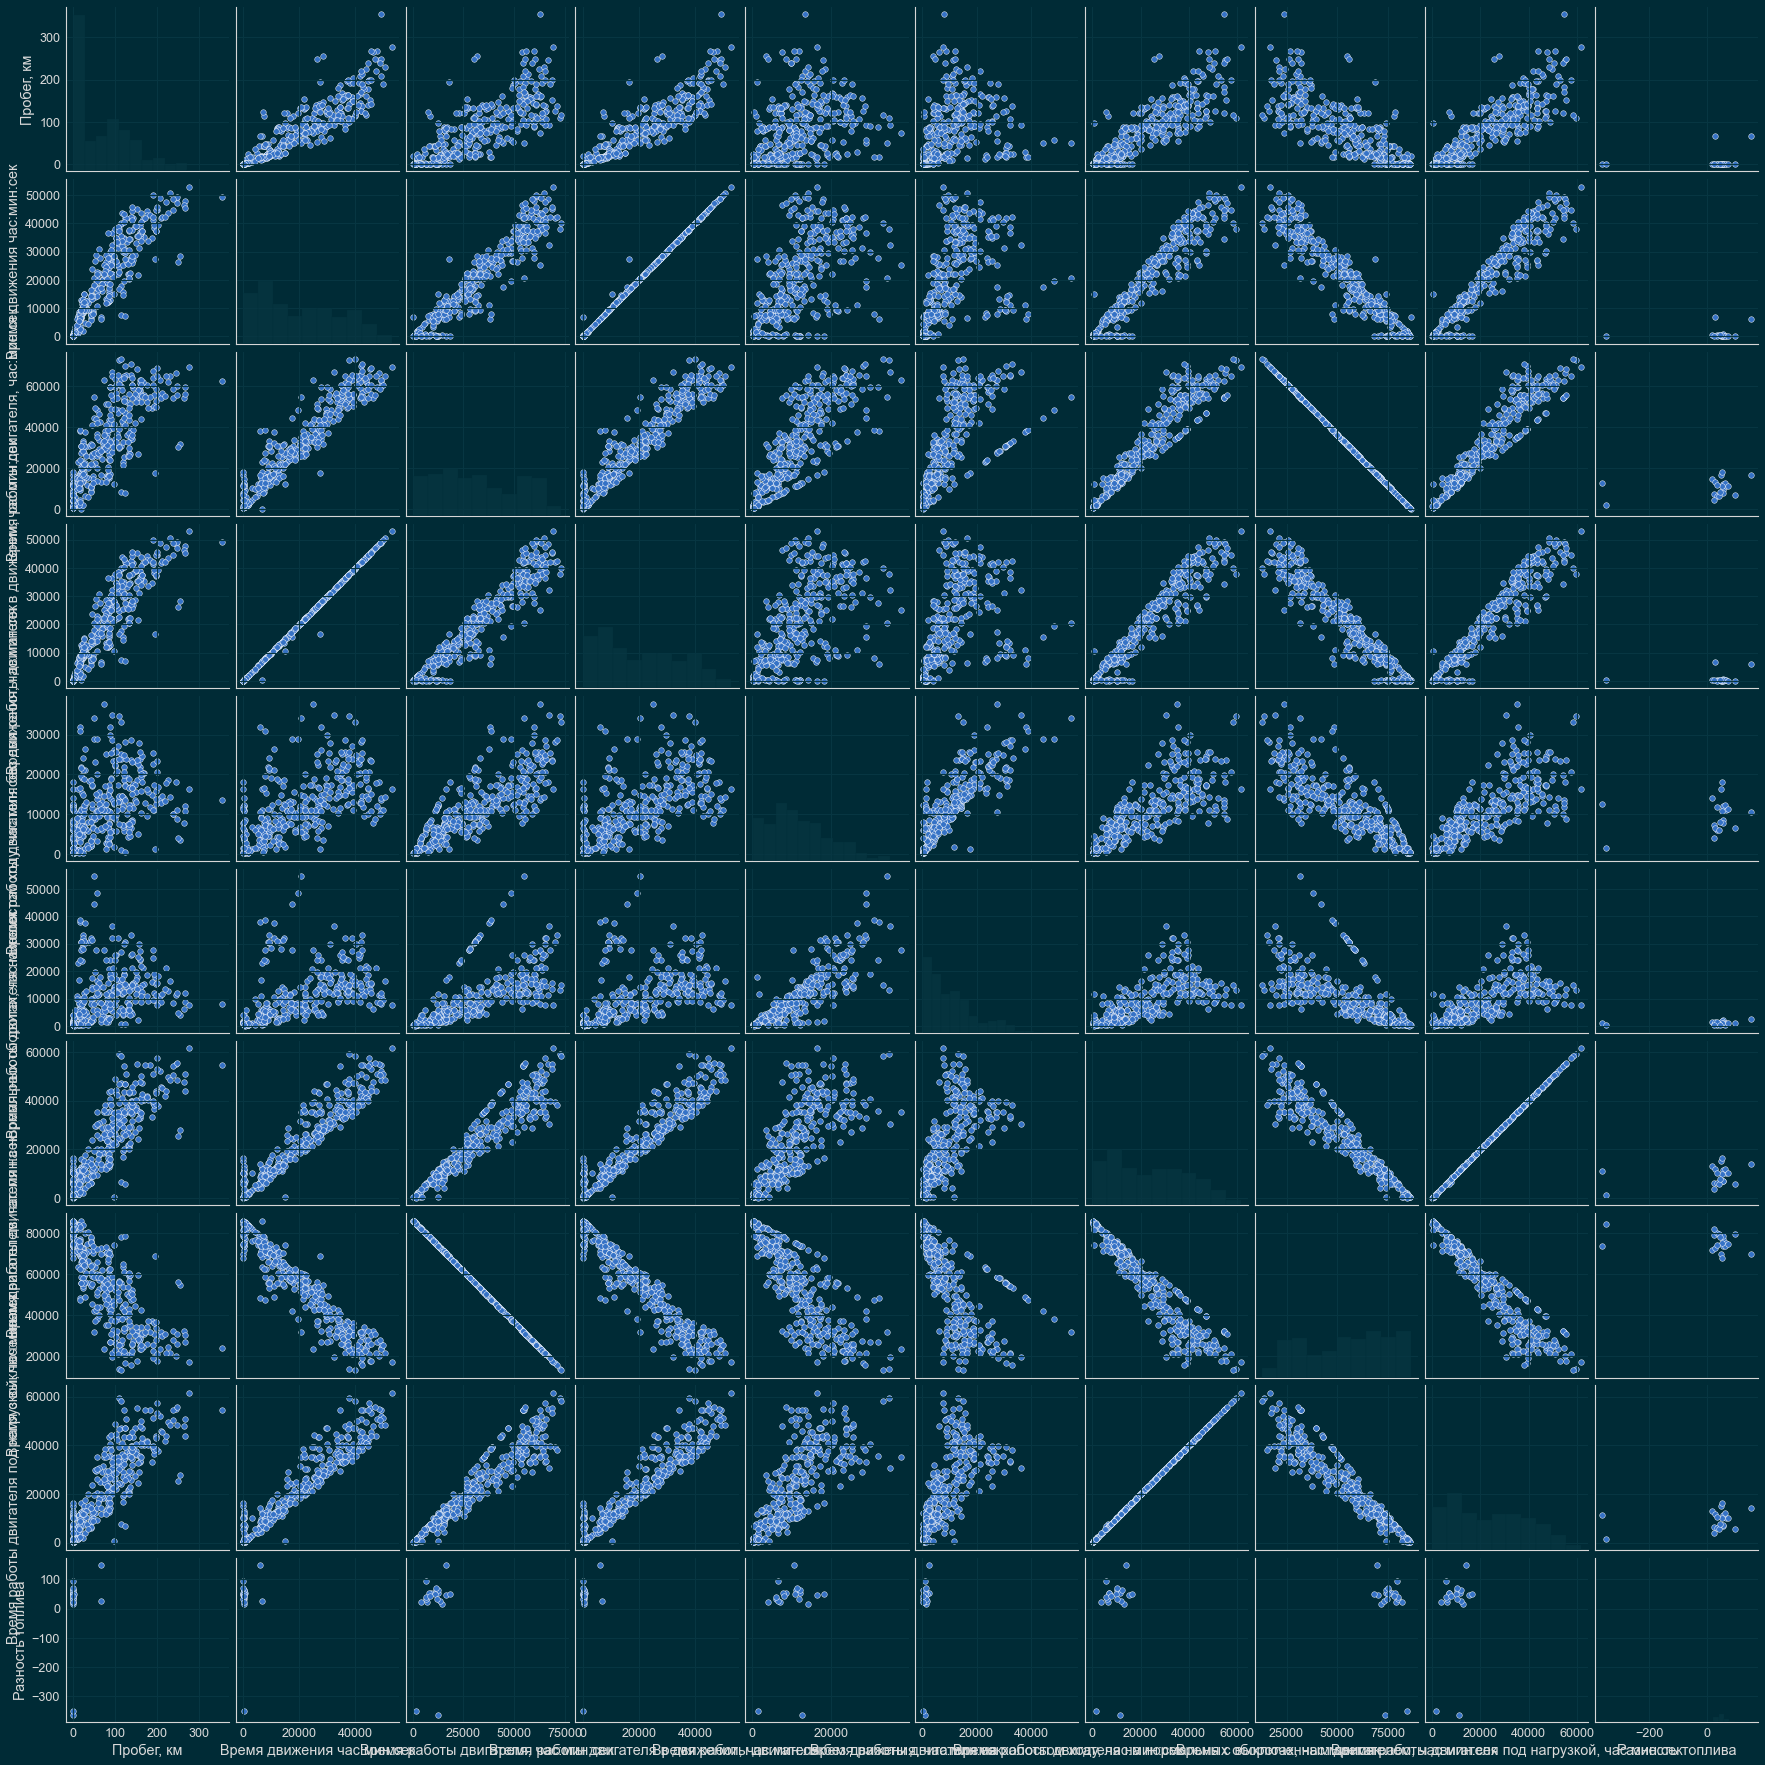

In [43]:
sns.pairplot(data_copy[data_copy.columns[1:]])
jtplot.style()

In [44]:
data_copy.columns[2:]

Index(['Пробег, км', 'Время движения час:мин:сек',
       'Время работы двигателя, час:мин:сек',
       'Время работы двигателя в движении, час:мин:сек',
       'Время работы двигателя без движения, час:мин:сек',
       'Время работы двигателя на холостом ходу, час:мин:сек',
       'Время работы двигателя на нормальных оборотах, час:мин:сек',
       'Время с выключенным двигателем, час:мин:сек',
       'Время работы двигателя под нагрузкой, час:мин:сек',
       'Разность топлива'],
      dtype='object')

супер линейная зависимость:

Время движения  - Время работы двигателя в движении

Время работы двигателя - Время с выключенным двигателем (обратная)

Время работы двигателя на нормальных оборотах - Время работы двигателя под нагрузкой

Соотношения

Время движения = время работы в движении

время работы двигателя = работа в движении + без движения

время работы под нагрузкой = норм. обороты + повышен. обороты

время с выключ двиг. = сутки - время работы двигателя

время работы двигателя = работа с нагрузкой + на холостом ходу

In [45]:
data.notna().sum()

id                                                            1197
Дата                                                          1197
Пробег, км                                                     391
Время движения час:мин:сек                                     343
Время работы двигателя, час:мин:сек                            346
Время работы двигателя в движении, час:мин:сек                 342
Время работы двигателя без движения, час:мин:сек               345
Время работы двигателя на холостом ходу, час:мин:сек           316
Время работы двигателя на нормальных оборотах, час:мин:сек     317
Время работы двигателя на предельных оборотах, час:мин:сек       5
Время с выключенным двигателем, час:мин:сек                    353
Время работы двигателя под нагрузкой, час:мин:сек              317
Начальный объём, л.1                                            21
Конечный объём, л.1                                             21
Разность топлива                                              

In [46]:
data_full = data.copy()
data_full

id       Дата  Пробег, км  Время движения час:мин:сек  \
0     734 2021-06-01         NaN                         NaN   
330   928 2021-06-01         NaN                         NaN   
600   939 2021-06-01        0.09                         NaN   
630   671 2021-06-01       85.32                     26692.0   
900   728 2021-06-01         NaN                         NaN   
...   ...        ...         ...                         ...   
689   786 2021-06-30         NaN                         NaN   
659   671 2021-06-30      248.03                     47025.0   
629   939 2021-06-30       67.20                     17090.0   
839   661 2021-06-30         NaN                         NaN   
1199  891 2021-06-30       18.56                      9218.0   

      Время работы двигателя, час:мин:сек  \
0                                     NaN   
330                                   NaN   
600                                   NaN   
630                               43536.0   
900                                   NaN   
...                                   ...   
689                                   NaN   
659                               55604.0   
629                               28353.0   
839                                   NaN   
1199                              30630.0   

      Время работы двигателя в движении, час:мин:сек  \
0                                                NaN   
330                                              NaN   
600                                              NaN   
630                                          26592.0   
900                                              NaN   
...                                              ...   
689                                              NaN   
659                                          46921.0   
629                                          17090.0   
839                                              NaN   
1199                                          9089.0   

      Время работы двигателя без движения, час:мин:сек  \
0                                                  NaN   
330                                                NaN   
600                                                NaN   
630                                            16944.0   
900                                                NaN   
...                                                ...   
689                                                NaN   
659                                             8683.0   
629                                            11263.0   
839                                                NaN   
1199                                           21541.0   

      Время работы двигателя на холостом ходу, час:мин:сек  \
0                                                   NaN      
330                                                 NaN      
600                                                 NaN      
630                                                 NaN      
900                                                 NaN      
...                                                 ...      
689                                                 NaN      
659                                                 NaN      
629                                              8339.0      
839                                                 NaN      
1199                                            30630.0      

      Время работы двигателя на нормальных оборотах, час:мин:сек  \
0                                                   NaN            
330                                                 NaN            
600                                                 NaN            
630                                             43536.0            
900                                                 NaN            
...                                                 ...            
689                                                 NaN            
659                                   

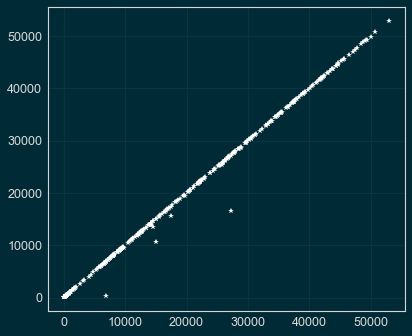

In [47]:
plt.plot(data_full['Время движения час:мин:сек'], data_full['Время работы двигателя в движении, час:мин:сек'], '*w')

In [48]:
data_full['Время работы двигателя в движении, час:мин:сек'].fillna(data_full['Время движения час:мин:сек'], inplace=True)

In [49]:
data_full.drop(columns = ['Время движения час:мин:сек'], axis=1, inplace=True)

In [50]:
data_full.notna().sum()

id                                                            1197
Дата                                                          1197
Пробег, км                                                     391
Время работы двигателя, час:мин:сек                            346
Время работы двигателя в движении, час:мин:сек                 343
Время работы двигателя без движения, час:мин:сек               345
Время работы двигателя на холостом ходу, час:мин:сек           316
Время работы двигателя на нормальных оборотах, час:мин:сек     317
Время работы двигателя на предельных оборотах, час:мин:сек       5
Время с выключенным двигателем, час:мин:сек                    353
Время работы двигателя под нагрузкой, час:мин:сек              317
Начальный объём, л.1                                            21
Конечный объём, л.1                                             21
Разность топлива                                                21
dtype: int64

In [51]:
day = np.array([86400 for i in range(1197)], dtype = 'float32')

In [52]:
data_full['Время работы двигателя, час:мин:сек'].fillna(day-data_full['Время с выключенным двигателем, час:мин:сек'], inplace=True)
data_full['Время с выключенным двигателем, час:мин:сек'].fillna(day-data_full['Время работы двигателя, час:мин:сек'], inplace=True)

In [53]:
data_full.notna().sum()

id                                                            1197
Дата                                                          1197
Пробег, км                                                     391
Время работы двигателя, час:мин:сек                            353
Время работы двигателя в движении, час:мин:сек                 343
Время работы двигателя без движения, час:мин:сек               345
Время работы двигателя на холостом ходу, час:мин:сек           316
Время работы двигателя на нормальных оборотах, час:мин:сек     317
Время работы двигателя на предельных оборотах, час:мин:сек       5
Время с выключенным двигателем, час:мин:сек                    353
Время работы двигателя под нагрузкой, час:мин:сек              317
Начальный объём, л.1                                            21
Конечный объём, л.1                                             21
Разность топлива                                                21
dtype: int64

In [54]:
data_full['Время работы двигателя в движении, час:мин:сек'].fillna(data_full['Время работы двигателя, час:мин:сек']-data_full['Время работы двигателя без движения, час:мин:сек'], inplace=True)
data_full['Время работы двигателя без движения, час:мин:сек'].fillna(data_full['Время работы двигателя, час:мин:сек']-data_full['Время работы двигателя в движении, час:мин:сек'], inplace=True)
data_full['Время работы двигателя, час:мин:сек'].fillna(data_full['Время работы двигателя без движения, час:мин:сек']+data_full['Время работы двигателя в движении, час:мин:сек'], inplace=True)

In [55]:
data_full.notna().sum()

id                                                            1197
Дата                                                          1197
Пробег, км                                                     391
Время работы двигателя, час:мин:сек                            353
Время работы двигателя в движении, час:мин:сек                 347
Время работы двигателя без движения, час:мин:сек               346
Время работы двигателя на холостом ходу, час:мин:сек           316
Время работы двигателя на нормальных оборотах, час:мин:сек     317
Время работы двигателя на предельных оборотах, час:мин:сек       5
Время с выключенным двигателем, час:мин:сек                    353
Время работы двигателя под нагрузкой, час:мин:сек              317
Начальный объём, л.1                                            21
Конечный объём, л.1                                             21
Разность топлива                                                21
dtype: int64

In [56]:
data_full['Время работы двигателя на нормальных оборотах, час:мин:сек'].fillna(data_full['Время работы двигателя под нагрузкой, час:мин:сек']-data_full['Время работы двигателя на предельных оборотах, час:мин:сек'], inplace=True)
data_full['Время работы двигателя на предельных оборотах, час:мин:сек'].fillna(data_full['Время работы двигателя под нагрузкой, час:мин:сек']-data_full['Время работы двигателя на нормальных оборотах, час:мин:сек'], inplace=True)
data_full['Время работы двигателя под нагрузкой, час:мин:сек'].fillna(data_full['Время работы двигателя на предельных оборотах, час:мин:сек']+data_full['Время работы двигателя на нормальных оборотах, час:мин:сек'], inplace=True)

In [57]:
data_full.notna().sum()

id                                                            1197
Дата                                                          1197
Пробег, км                                                     391
Время работы двигателя, час:мин:сек                            353
Время работы двигателя в движении, час:мин:сек                 347
Время работы двигателя без движения, час:мин:сек               346
Время работы двигателя на холостом ходу, час:мин:сек           316
Время работы двигателя на нормальных оборотах, час:мин:сек     317
Время работы двигателя на предельных оборотах, час:мин:сек     317
Время с выключенным двигателем, час:мин:сек                    353
Время работы двигателя под нагрузкой, час:мин:сек              317
Начальный объём, л.1                                            21
Конечный объём, л.1                                             21
Разность топлива                                                21
dtype: int64

In [58]:
data_full['Время работы двигателя под нагрузкой, час:мин:сек'].fillna(data_full['Время работы двигателя, час:мин:сек']-data_full['Время работы двигателя на холостом ходу, час:мин:сек'], inplace=True)
data_full['Время работы двигателя на холостом ходу, час:мин:сек'].fillna(data_full['Время работы двигателя, час:мин:сек']-data_full['Время работы двигателя под нагрузкой, час:мин:сек'], inplace=True)
data_full['Время работы двигателя, час:мин:сек'].fillna(data_full['Время работы двигателя на холостом ходу, час:мин:сек']+data_full['Время работы двигателя под нагрузкой, час:мин:сек'], inplace=True)

In [59]:
# БЫЛО
data.notna().sum()

id                                                            1197
Дата                                                          1197
Пробег, км                                                     391
Время движения час:мин:сек                                     343
Время работы двигателя, час:мин:сек                            346
Время работы двигателя в движении, час:мин:сек                 342
Время работы двигателя без движения, час:мин:сек               345
Время работы двигателя на холостом ходу, час:мин:сек           316
Время работы двигателя на нормальных оборотах, час:мин:сек     317
Время работы двигателя на предельных оборотах, час:мин:сек       5
Время с выключенным двигателем, час:мин:сек                    353
Время работы двигателя под нагрузкой, час:мин:сек              317
Начальный объём, л.1                                            21
Конечный объём, л.1                                             21
Разность топлива                                              

In [60]:
# СТАЛО
data_full.notna().sum()

id                                                            1197
Дата                                                          1197
Пробег, км                                                     391
Время работы двигателя, час:мин:сек                            353
Время работы двигателя в движении, час:мин:сек                 347
Время работы двигателя без движения, час:мин:сек               346
Время работы двигателя на холостом ходу, час:мин:сек           346
Время работы двигателя на нормальных оборотах, час:мин:сек     317
Время работы двигателя на предельных оборотах, час:мин:сек     317
Время с выключенным двигателем, час:мин:сек                    353
Время работы двигателя под нагрузкой, час:мин:сек              346
Начальный объём, л.1                                            21
Конечный объём, л.1                                             21
Разность топлива                                                21
dtype: int64

In [23]:
data['id'].unique(), len(data['id'].unique())

(array([734, 928, 939, 671, 728, 681, 113, 786, 606, 585, 154, 877, 915,
        230, 298, 740, 757, 612, 837, 106, 661, 411, 805, 891, 969, 158,
        410, 638, 916, 123, 885, 788, 471, 242, 578, 930, 341, 982, 155,
        783], dtype=int64),
 40)

In [101]:
#Не работали совсем тракторы
list_without_work = [928, 728, 681, 786, 606, 154, 877, 915, 230, 298, 757, 612, 
                     837, 106, 661, 805, 969, 158, 916, 123, 885, 471, 578, 930, 982, 783]
len(list_without_work)

26

In [177]:
data_full.to_excel('./data_full.xls',encoding='cp1251', index=False)

<ipython-input-177-3c5ca62558cb>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data_full.to_excel('./data_full.xls',encoding='cp1251', index=False)


In [179]:
data_work = pd.read_excel('data_full.xls')
data = data_work.sort_values(by='Дата')
data['id'].unique(), len(data['id'].unique())

(array([734, 805, 891, 969, 158, 410, 638, 916, 885, 788, 471, 242, 578,
        930, 341, 982, 155, 783, 411, 661, 123, 837, 106, 939, 671, 728,
        681, 113, 786, 606, 585, 928, 877, 915, 230, 298, 740, 757, 612,
        154], dtype=int64),
 40)

норм данные - 14 тракторов

только пробег +-время работы - 7

только дата - 19 

In [1]:
mask = (data['id'] == 734)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-')
plt.legend(data.columns[2:])

NameError: name 'data' is not defined

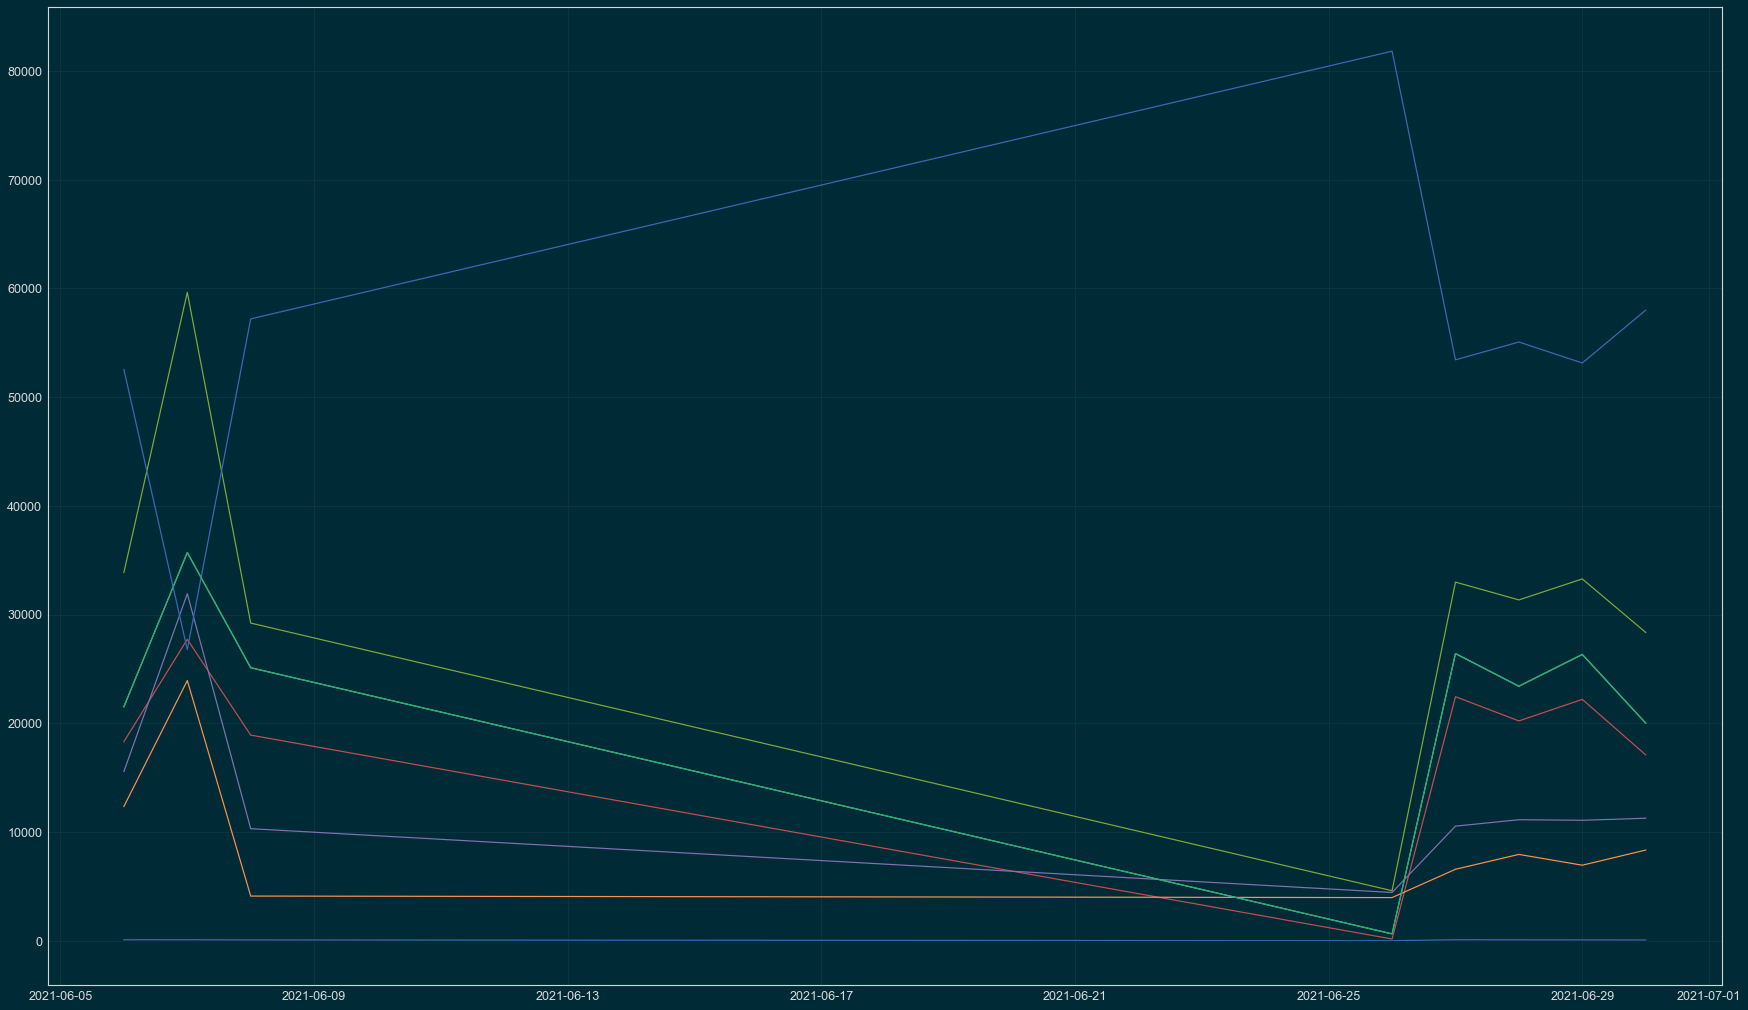

In [146]:
mask = (data['id'] == 939)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

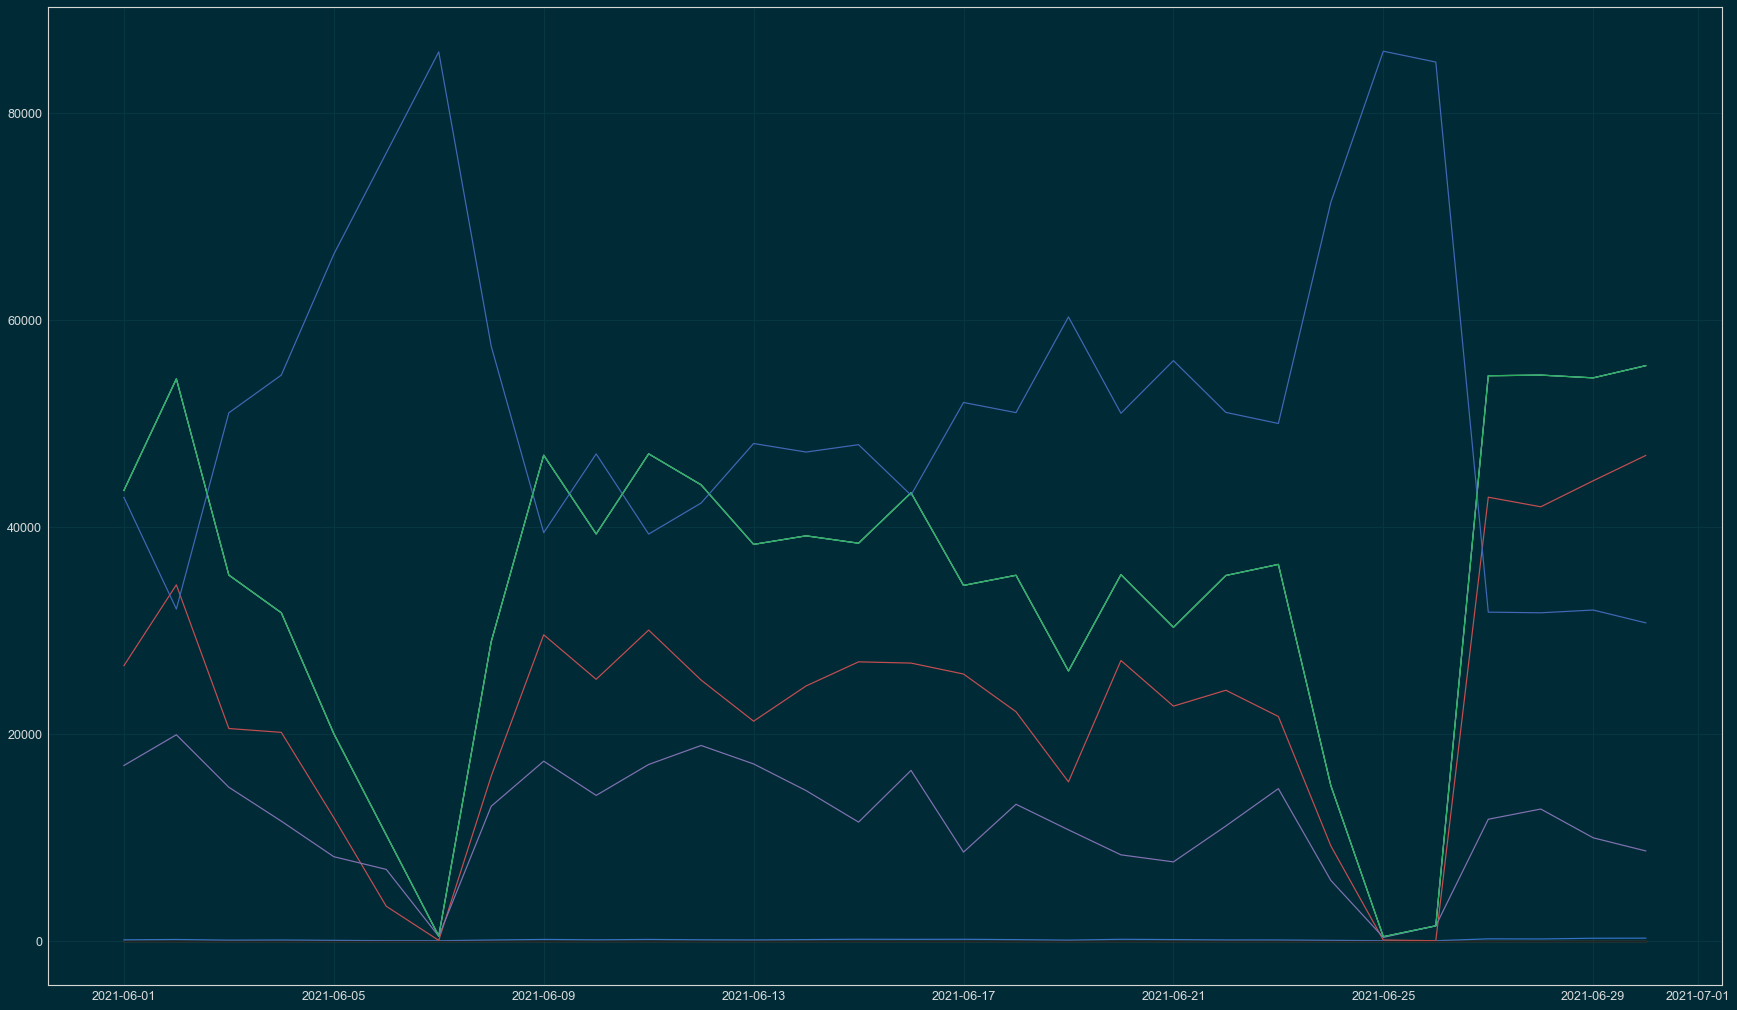

In [147]:
mask = (data['id'] == 671)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

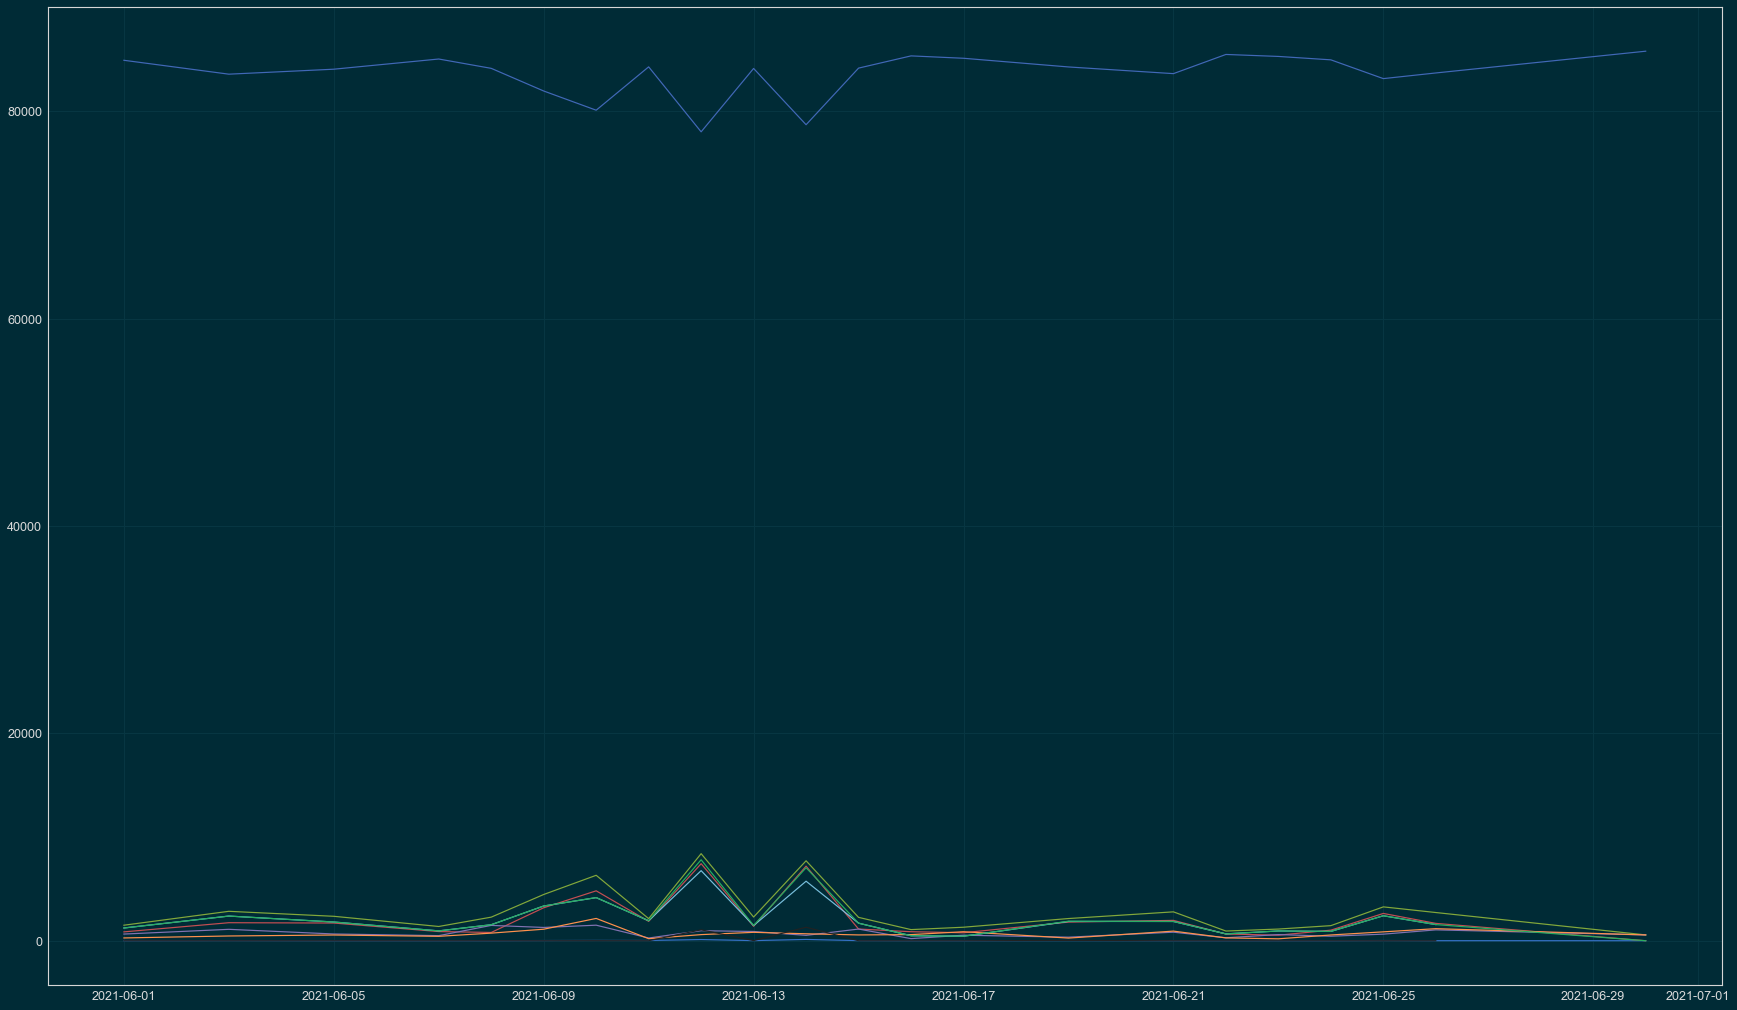

In [148]:
mask = (data['id'] == 113)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

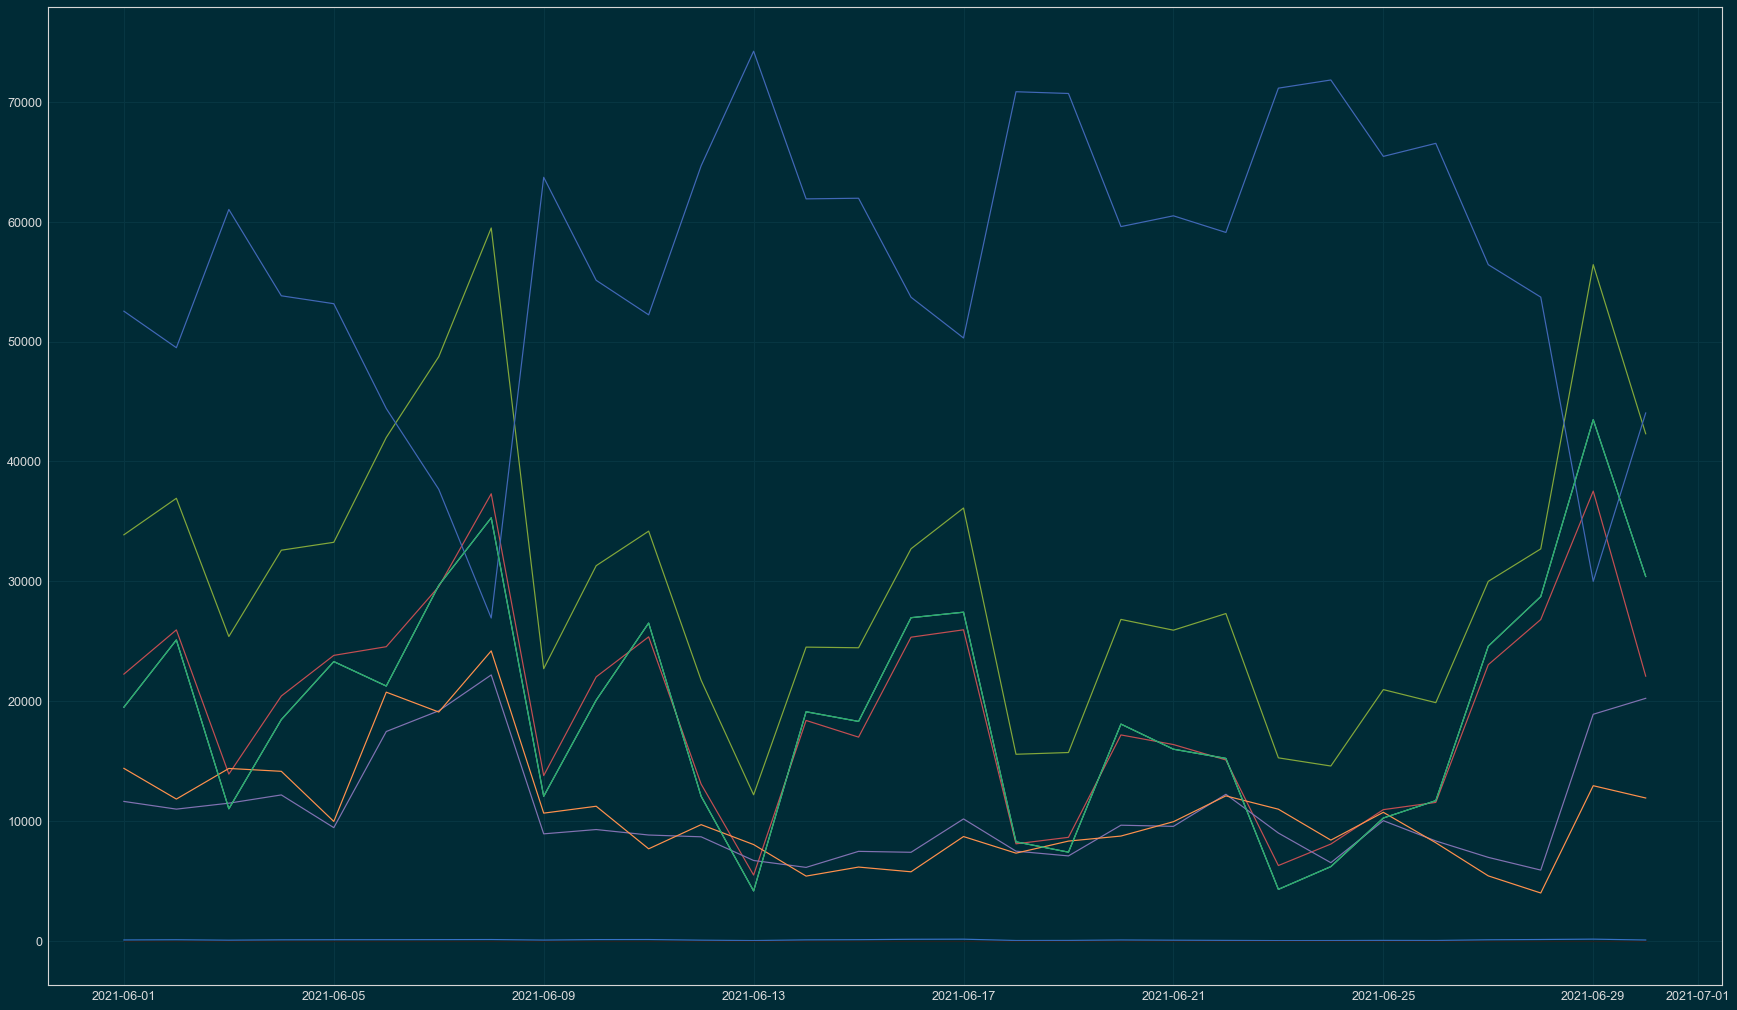

In [149]:
mask = (data['id'] == 585)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

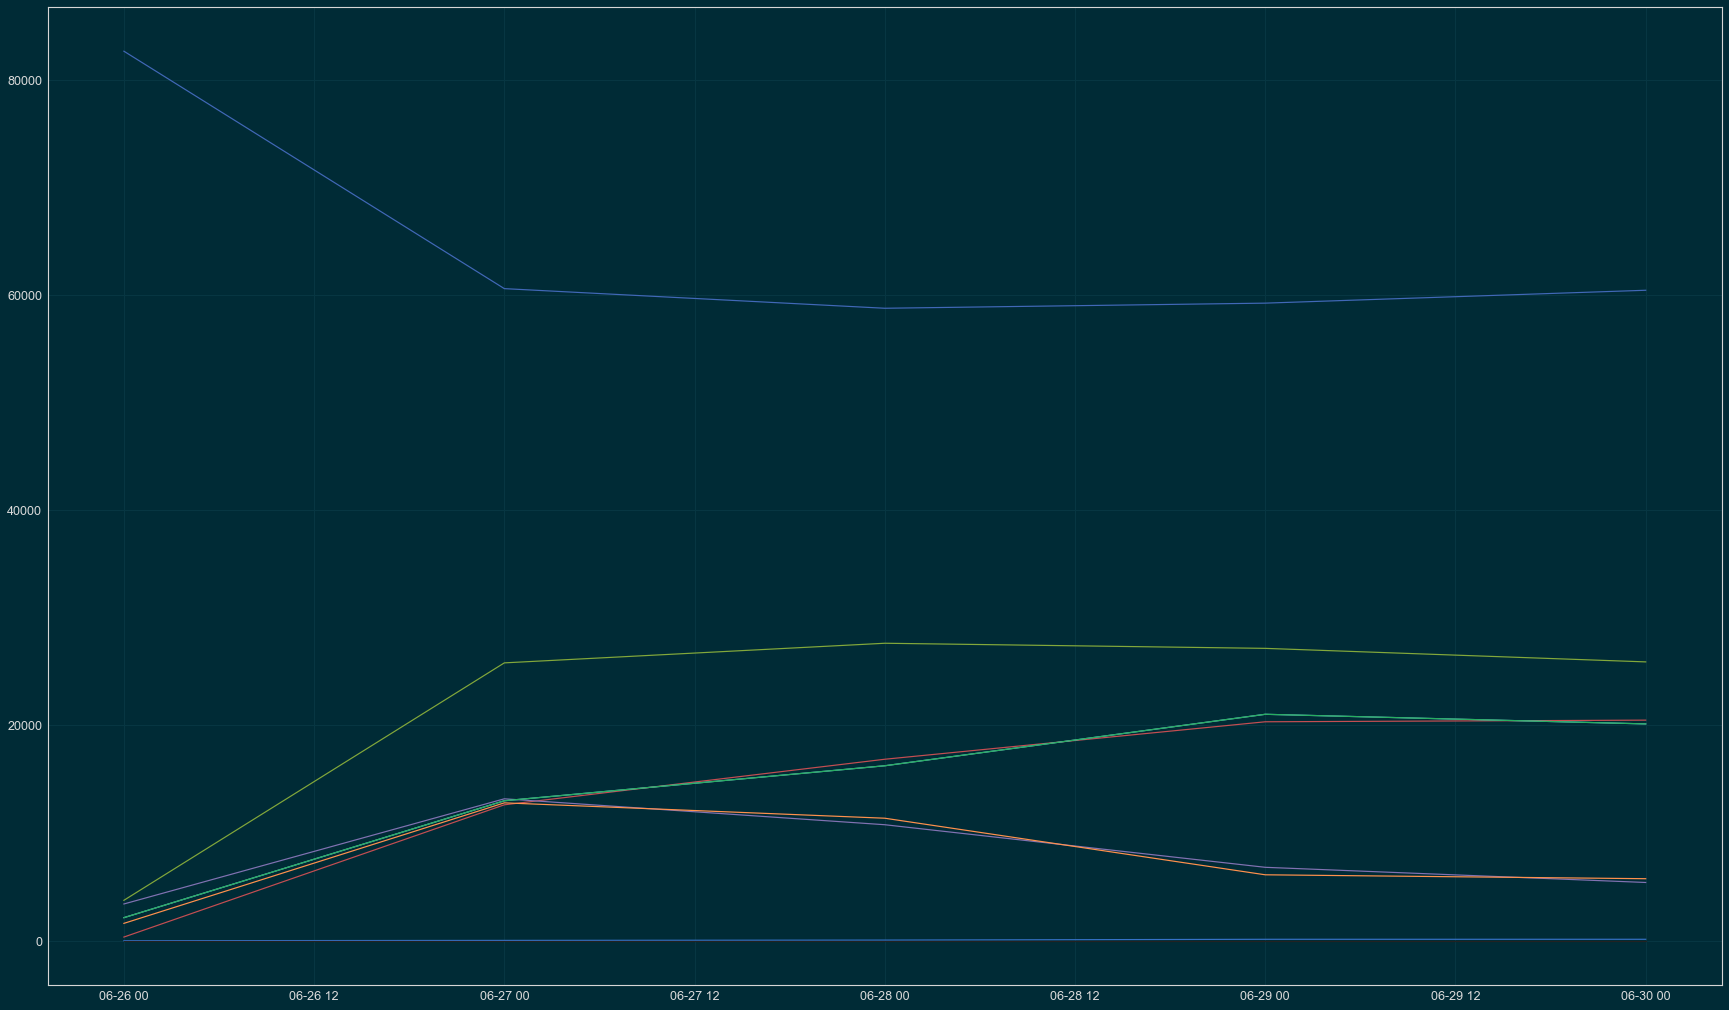

In [150]:
mask = (data['id'] == 740)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

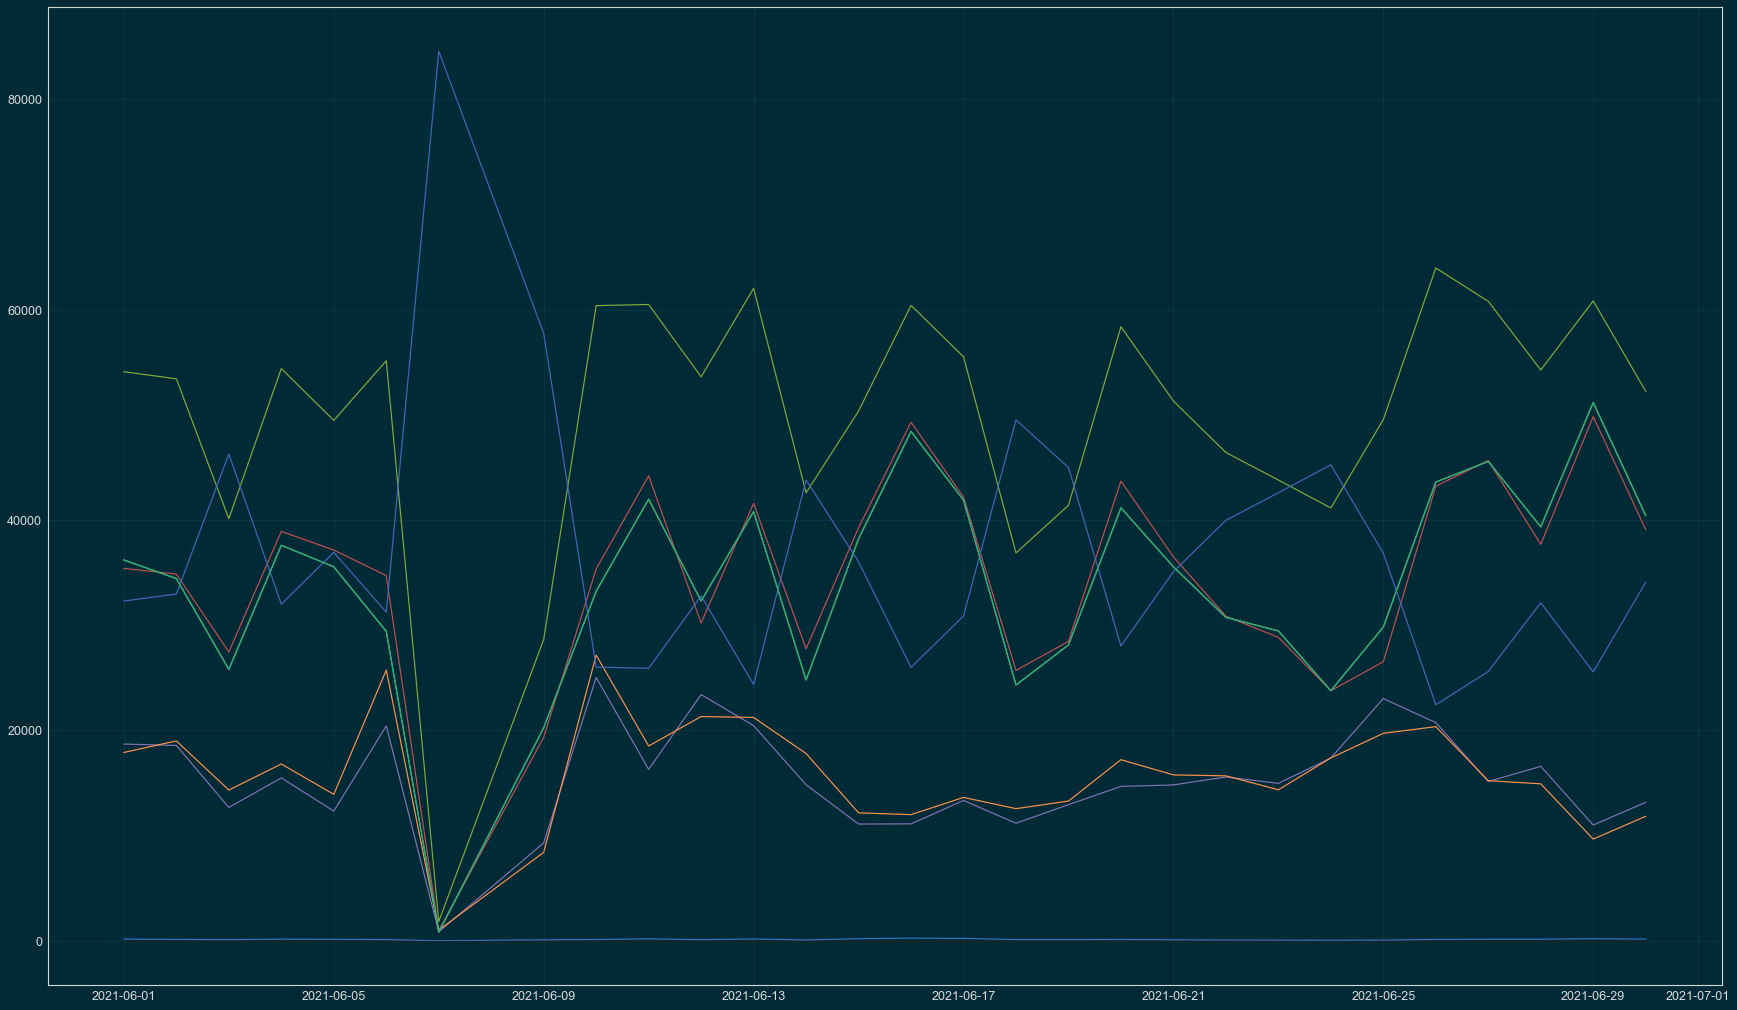

In [151]:
mask = (data['id'] == 411)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

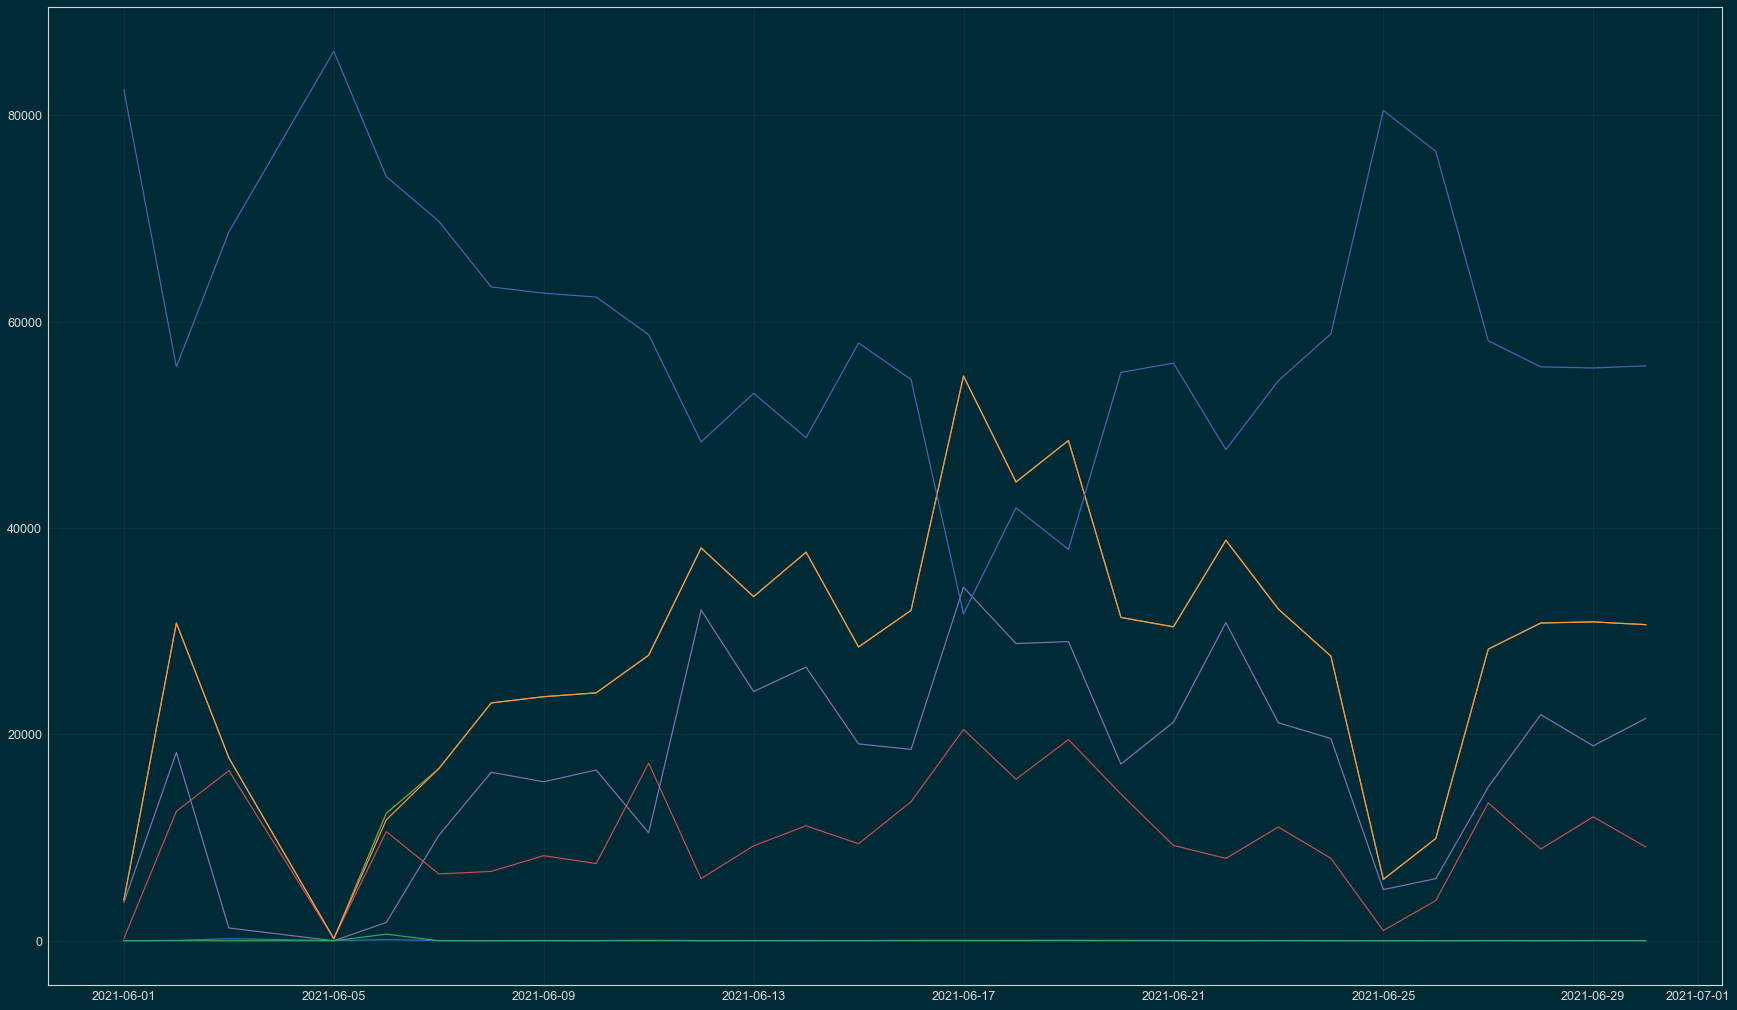

In [152]:
mask = (data['id'] == 891)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

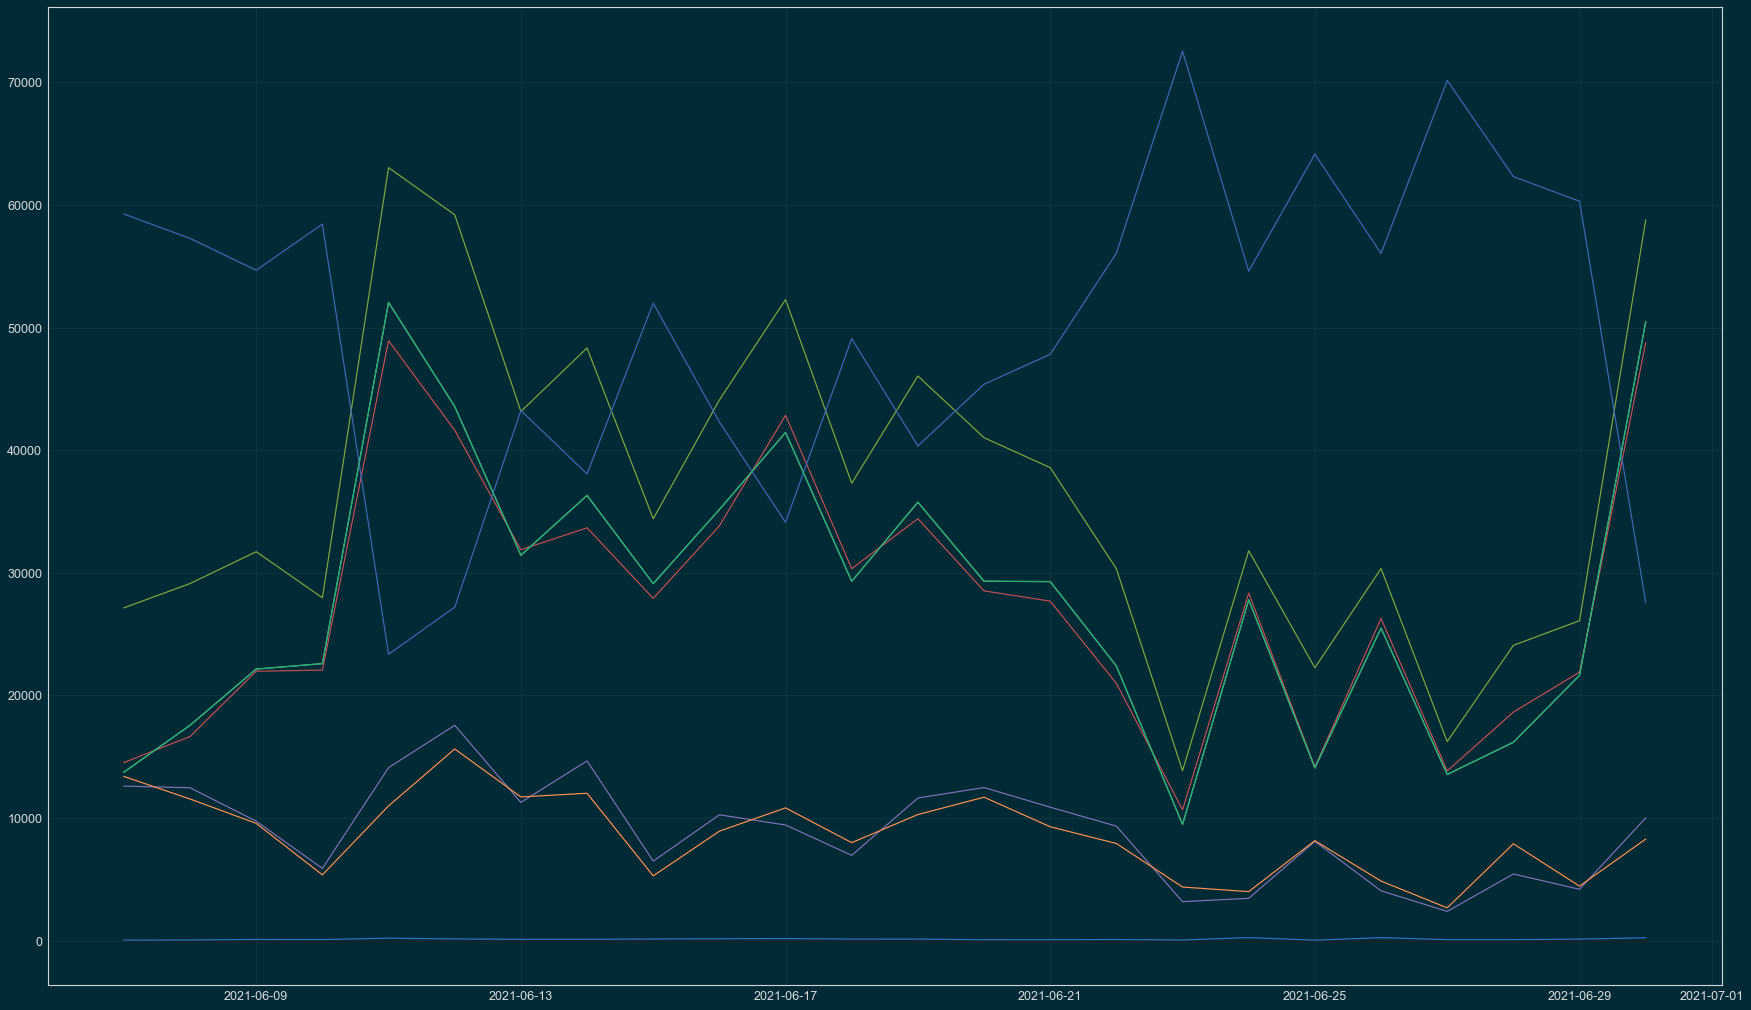

In [153]:
mask = (data['id'] == 410)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

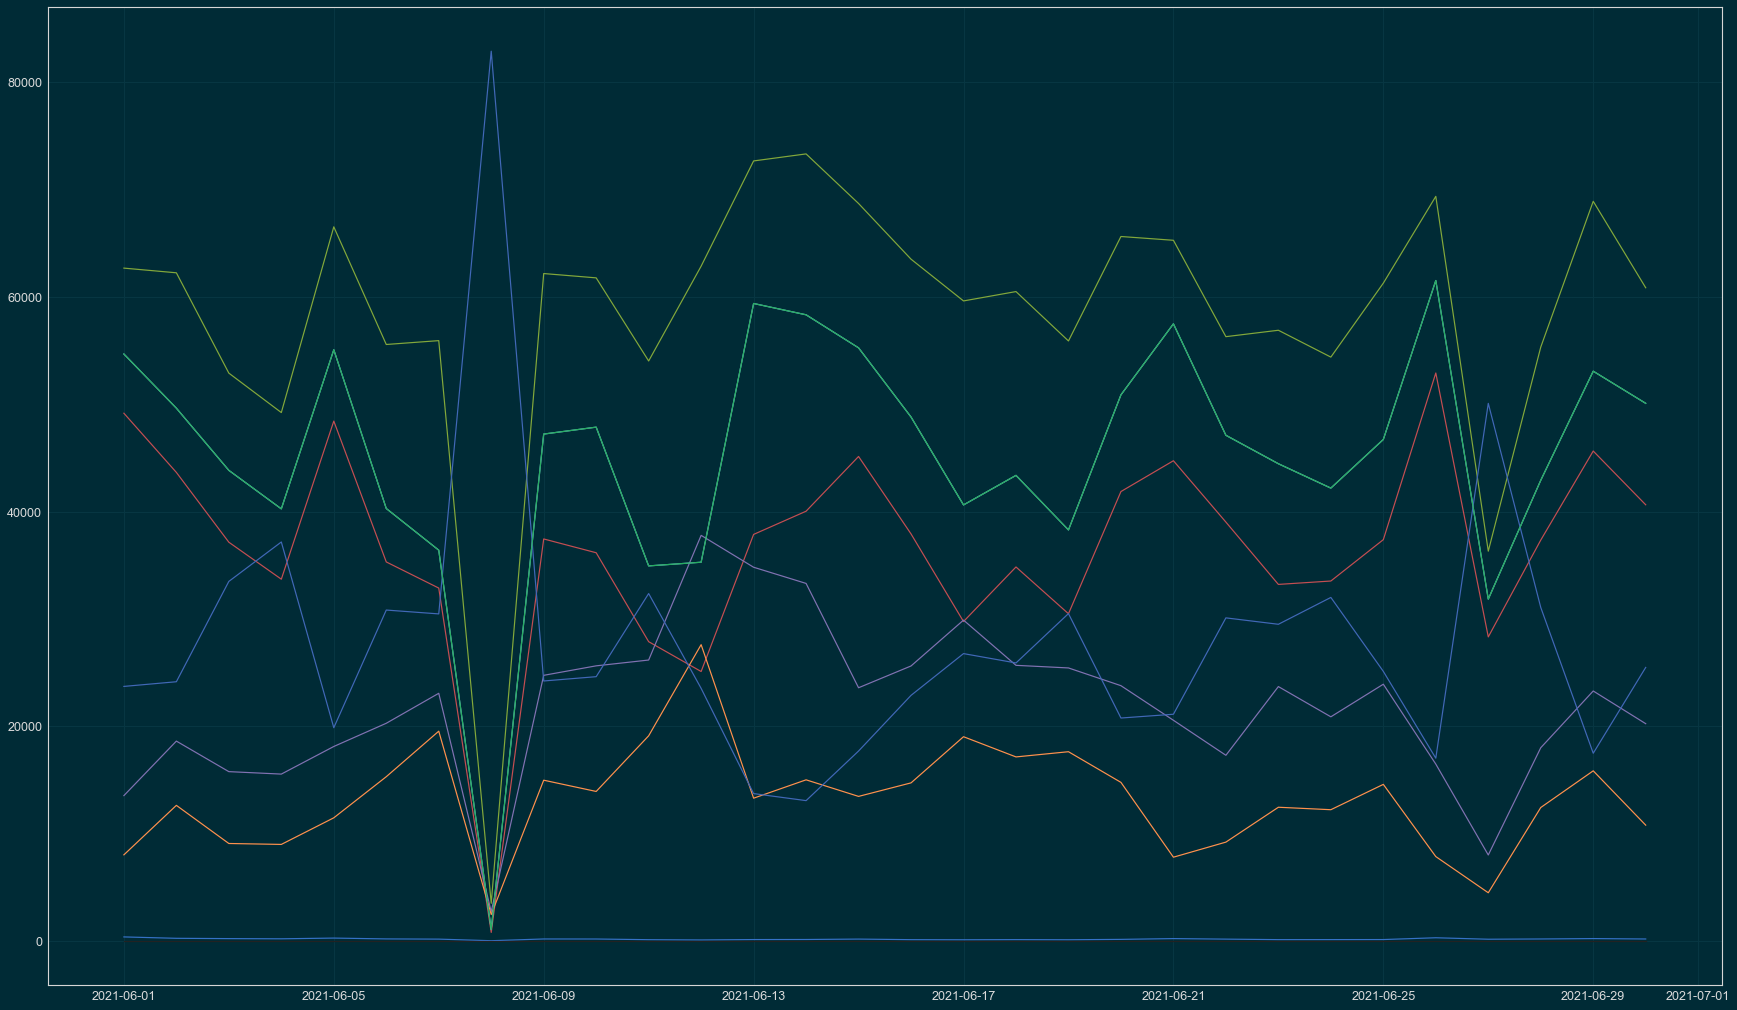

In [154]:
mask = (data['id'] == 638)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

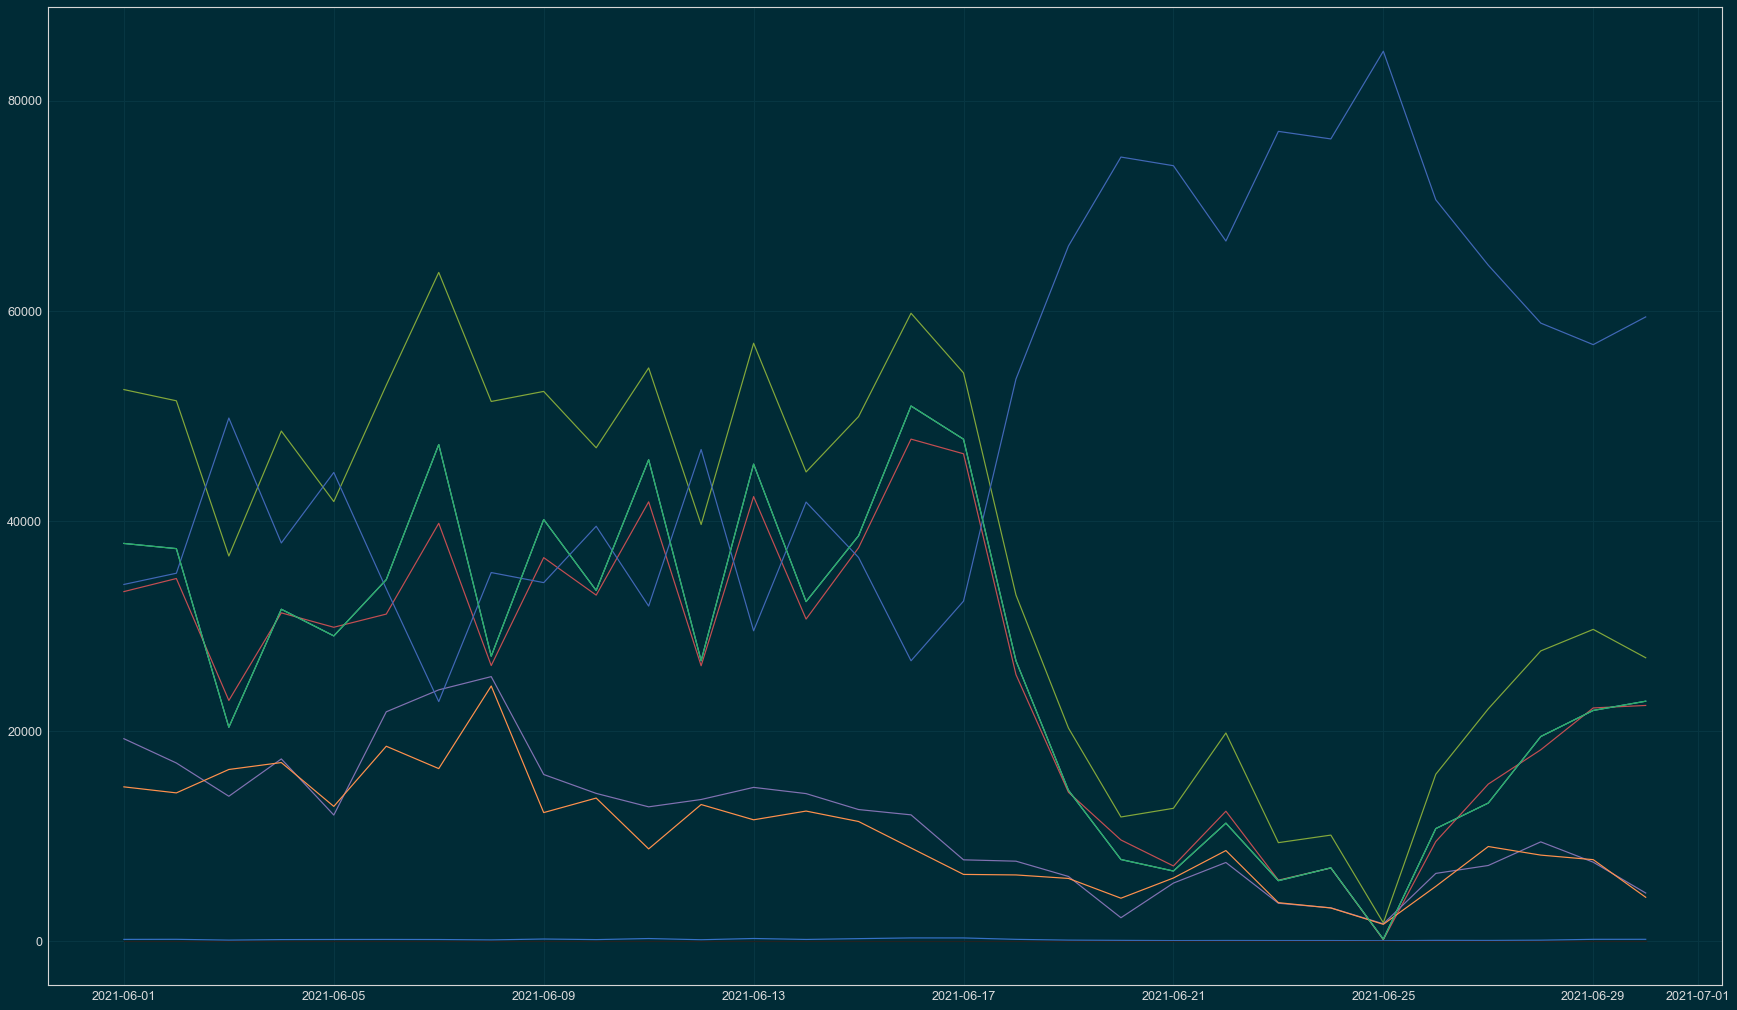

In [155]:
mask = (data['id'] == 788)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

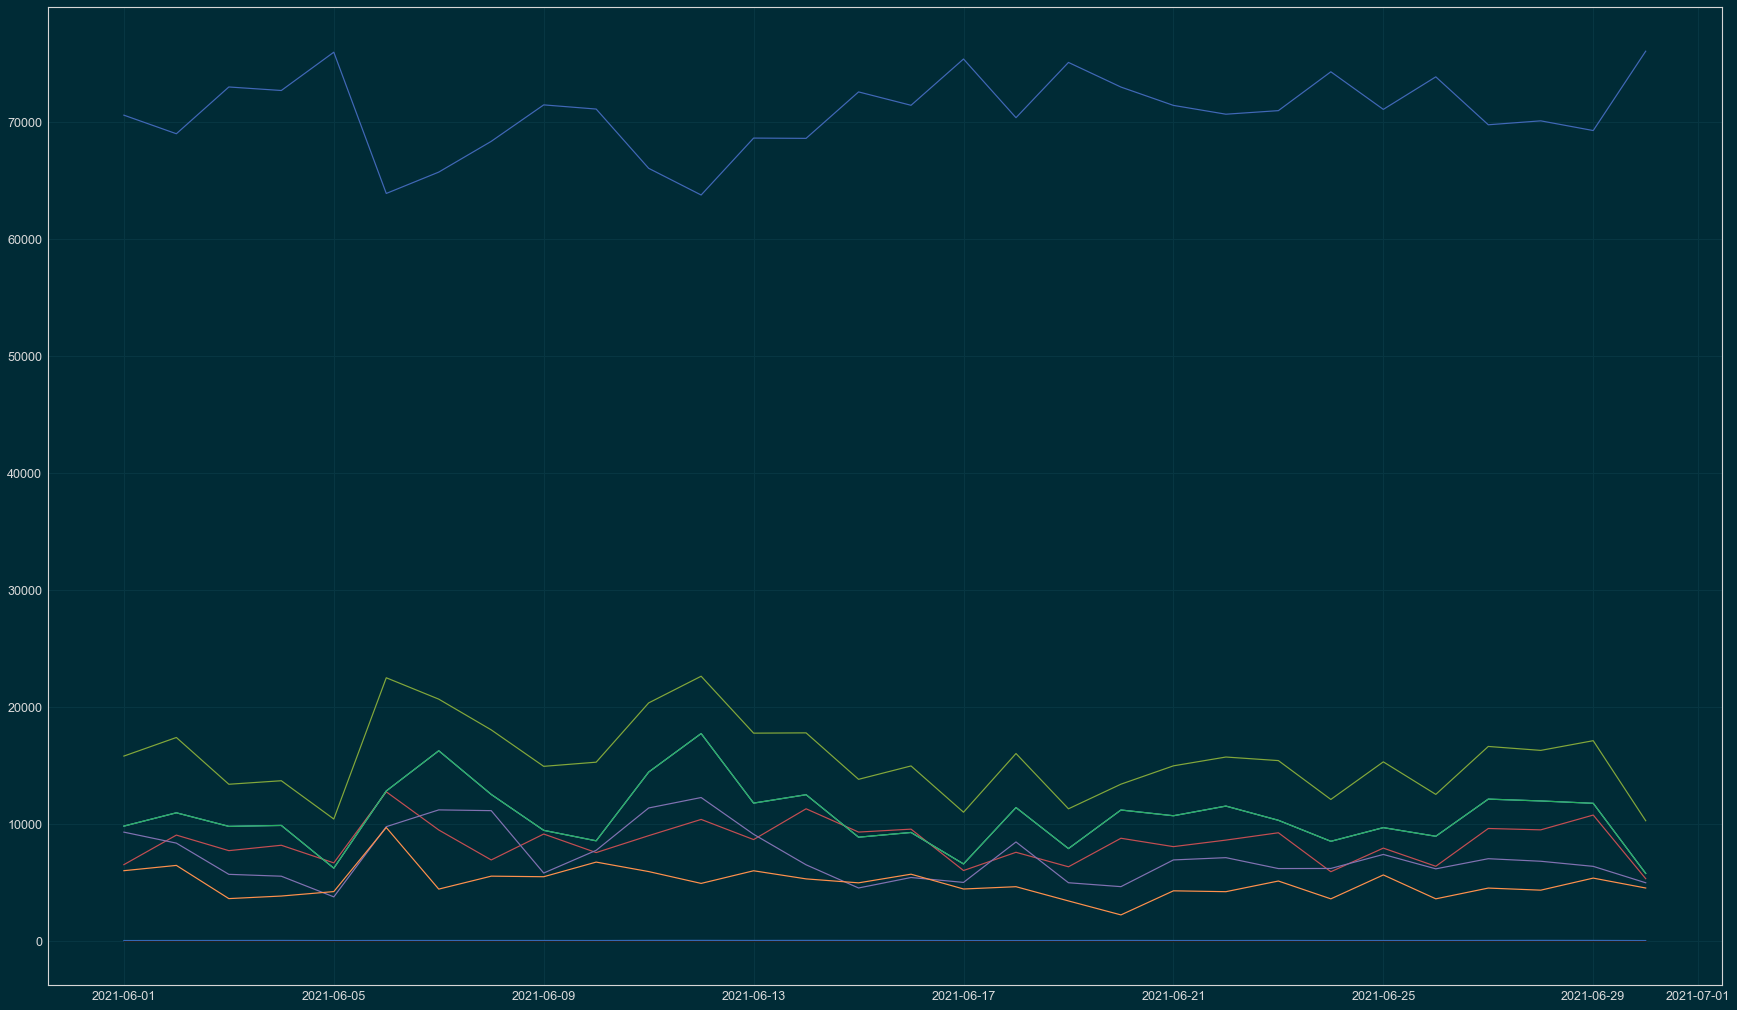

In [156]:
mask = (data['id'] == 242)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

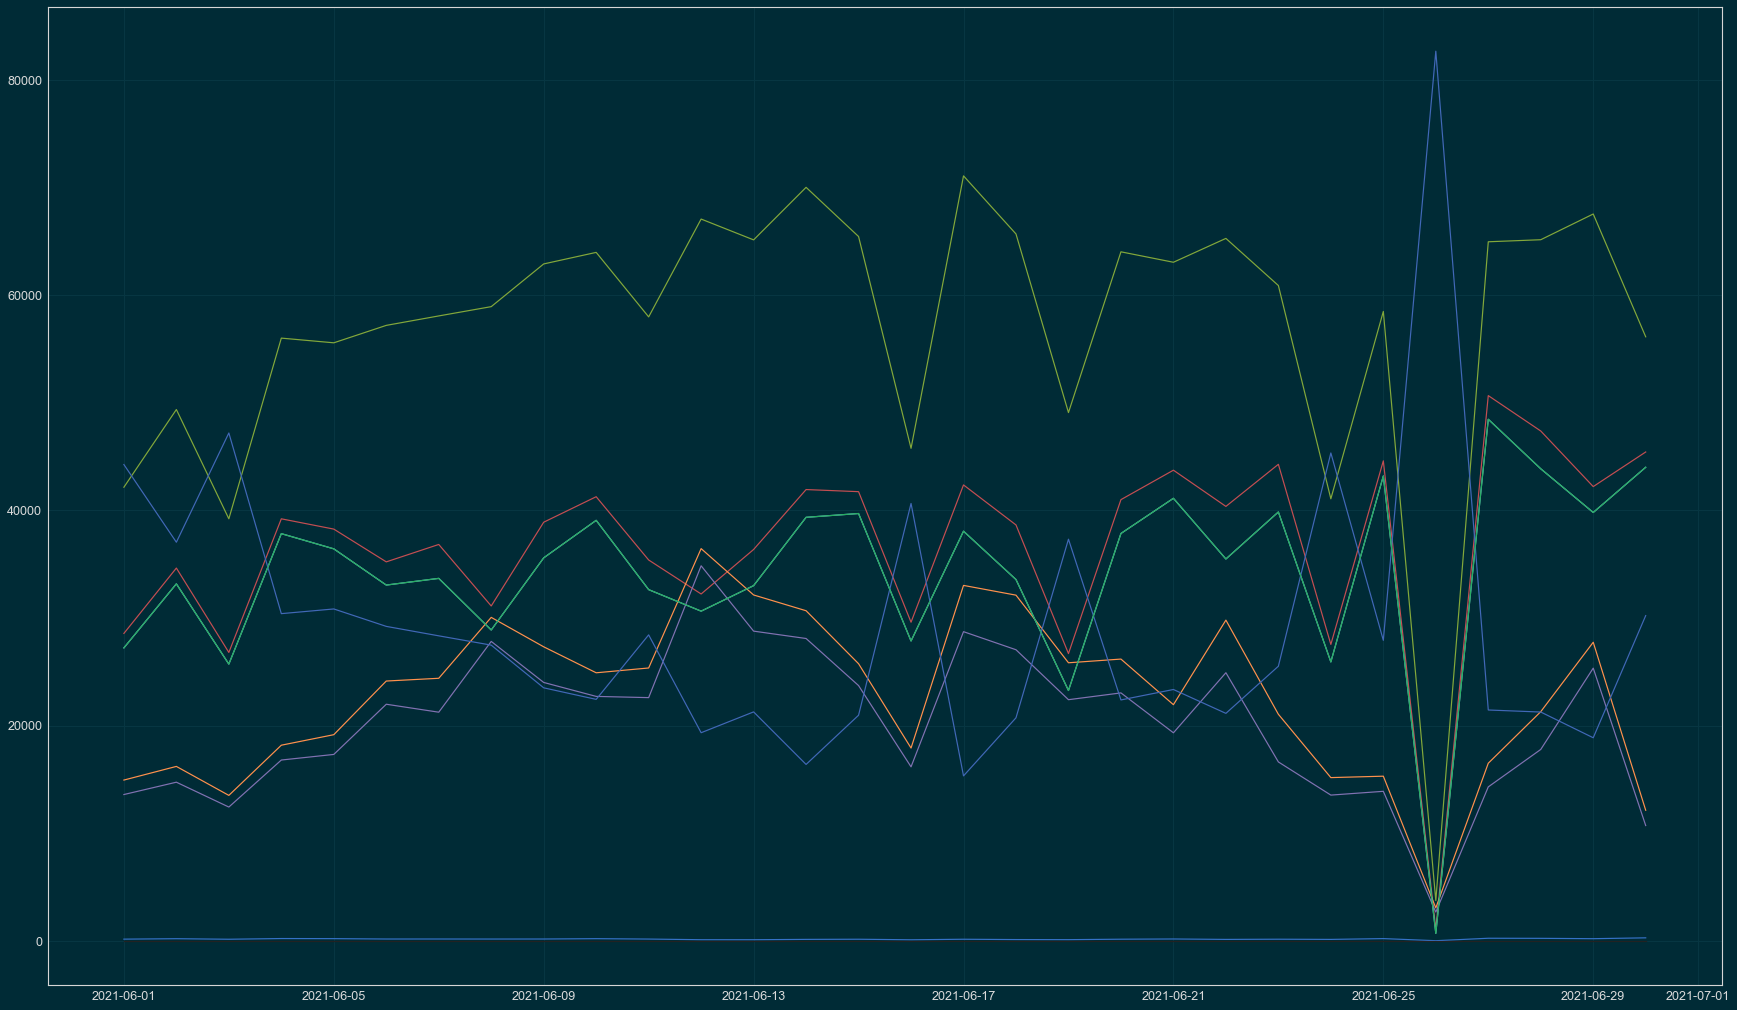

In [157]:
mask = (data['id'] == 341)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

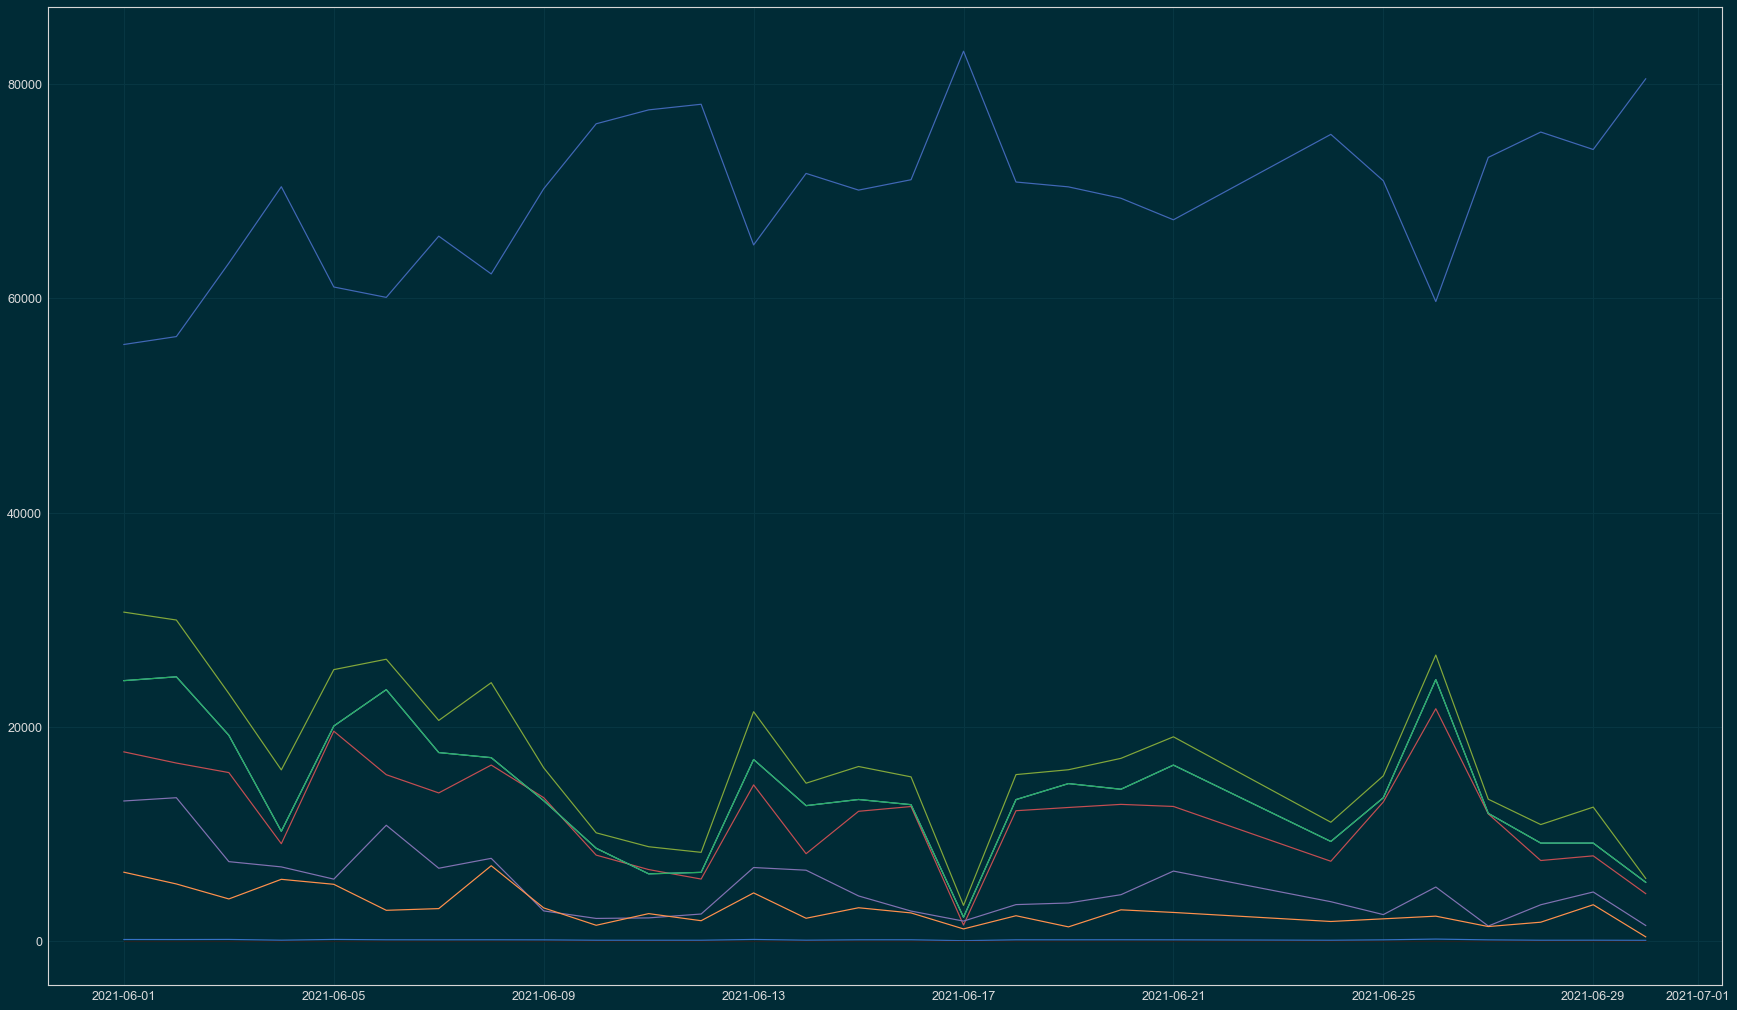

In [158]:
mask = (data['id'] == 155)
plt.figure(figsize=(30, 18)) 
plt.plot(data.loc[mask, 'Дата'], data[data.columns[2:-3]].loc[mask], '-');

тракторы не работали некоторые

трактор работал на повышенных оборотах

трактор работал на холостых оборотах

неравномерно распределена нагрузка

нет контроля за работой тракторов и плохо собираются данные (интернет вещей)